# PHAS0030 Mini-Project Logbook - 19002781

## Gas

In [1]:
# Importing appropirate modules
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import maxwell
from scipy import integrate
import scipy.optimize
from scipy.stats import pearsonr

## 25/01/21

I will begin my investigation by writing a function to determine the number of times a single particle collides with each boundary within a total time of one second. Following on from this I will be able to determine the pressure caused by this particle.

In [2]:
def collision(T,m,w,h):
    """
    This function determines the number of times a single gas particle at an absolute 
    temperature T and mass m collides with the four boundaries of it's 2D container with 
    dimensions width (w) and height (h) in one second. The starting position is
    random as well as the initial direction.
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    
    Outputs:
    p1 - number of collisions with the top of the box
    p2 - number of collisions with the bottom of the box
    p3 - number of collisions with the right side of the box
    p4 - number of collisions with the left side of the box
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5 
    
    # Initial starting positions defined to be within box's dimensions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity 
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Randomly determining components of velocity
    u = (random.uniform(-1,1)) * s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))

    # Setting up timestep and initializing timer
    dt = 1e-5
    t = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Propagation of particle
    while t<1:
        
        # Equations of motion
        x = x0 + u*t
        y = y0 + v*t
        
        # Progressing time
        t += dt
        
        # Boundary conditions (perfectly elastic collisions)
        # Incrementing collision counters
        if x > w-tol:
            u = -u
            p3 += 1
        if x < tol:
            u = -u 
            p4 += 1
        if y > h-tol:
            v = -v
            p1 += 1
        if y < tol:
            v = -v
            p2 += 1
            
    return p1,p2,p3,p4

This function randomly determines a single particle's initial position within the specfied dimensions of the box. The temperature input determines the magnitude of the particle's velocity $s=\sqrt{\frac{2k_BT}{m}}$ where the Boltzmann constant $k_B$ is set to unity. 

This is calculated by adding one to p1, p2, p3 or p4 when the particle's position coincides with one of the boundaries of the box. Upon collision the velocity component perpendicular to the boundary is reversed to represent a perfectly elastic collision (no kinetic energy lost).

I will not extend this function to calculate pressure.

In [3]:
collision(100,1,10,10)

(16893, 16893, 1, 0)

In [4]:
def pressure(T,m,w,h):
    """
    This function determines the pressure exerted on the boundaries of the box due to a gas 
    particle of mass m and absolute temperature T in a box of width w and height h. Pressure 
    is measured in standard units as k_B is set to unity.
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    
    Outputs:
    p - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5 
    
    # Initial starting positions defined to be within box's dimensions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity 
    k_B = 1
    
    # Average speed equation - note to extend this to 
    # MB distribution in future refinements
    s = np.sqrt((2*k_B*T)/m)
    
    # Randomly determining components of velocity
    u = (random.uniform(-1,1)) * s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))

    # Setting up timestep and initializinf timer
    dt = 1e-5
    t = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Propagation of particle
    while t<1:
        
        # Equations of motion
        x = x0 + u*t
        y = y0 + v*t
        
        # Progressing time
        t += dt
        
        # Boundary conditions (perfectly elastic collisions)
        # Incrementing collision counters 
        if x > w-tol:
            u = -u
            p3 += 1
        if x < tol:
            u = -u 
            p4 += 1
        if y > h-tol:
            v = -v
            p1 += 1
        if y < tol:
            v = -v
            p2 += 1
    
    # Determining pressure using N2 law of motion
    total_p = ((p1 * 2 * m * abs(v))/ w * dt)
    + ((p2 * 2 * m * abs(v))/ w * dt) 
    + ((p3 * 2 * m * abs(u))/ h * dt)
    + ((p4 * 2 * m * abs(u))/ h * dt)
        
    return total_p

This function uses the same calculations as collision(T,m,w,h) but instead returns the total pressure exerted on the sides of the box due to the collisions with the gas particle. In order to calculate this, for each boundary I have multiplied the number of collisions with the pressure one collision would have inflicted $p=\frac{2mv}{area*dt}$. Then I have summed each pressure value to output the total pressure exerted on the box.

In [5]:
pressure(100,1,10,10)

0.21343155512832895

In [6]:
pressure(1000,1,10,10)

1.3240219573061742

In [7]:
pressure(100,1,20,20)

1.3791346637846167e-05

As you can see increasing the temperature increases the average velocity of the particle so there are more frequent collisions exerting a larger impulse, hence the pressure is greater as expected.

Also, increasing the area of the box decreases the pressure as it takes longer for the particle to traverse the box between collsions.

I will next seek to extend my collision function to take 'N' number of particles.

### 26/01/21

In [8]:
def collision_N(T,m,w,h,N):
    """
    This function determines the number of times N gas particle(s) at an absolute temperature 
    T and mass m collide  with the four boundaries of the 2D container with dimensions 
    width (w) and height (h) in one second. The starting position(s) are random as well as 
    the particles' initial direction(s).
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    
    Outputs:
    p1 - number of collisions with the top of the box
    p2 - number of collisions with the bottom of the box
    p3 - number of collisions with the right side of the box
    p4 - number of collisions with the left side of the box
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,10-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,10-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Setting up timestep and initializing timer
    dt = 1e-5
    t = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Position arrays
    x = [0]
    y = [0]
    
    # Looping over each particle individually
    o = 0 # Parameter to label each particle 
    while o < N:
        
        # Propagation of particles
        while t<1:
            
            # Equations of motion
            x.append(x0[o] + u[o]*t)
            y.append(y0[o] + v[o]*t)
            
            # Progressing time
            t += dt
            
            # Boundary conditions (perfectly elastic collisions) 
            # Incrementing collision counters
            if x[o] > w-tol:
                u[o] = -u[o]
                p3 += 1
            if x[o] < tol:
                u[o] = -u[o] 
                p4 += 1
            if y[o] > h-tol:
                v[o] = -v[o]
                p1 += 1
            if y[o] < tol:
                v[o] = -v[o]
                p2 += 1
        # Considering next particle's collisions
        o += 1
        
        # Setting timer to zero and repeating for next particle
        t = 0 
        
    return p1,p2,p3,p4

In [9]:
collision_N(100,1,10,10,10)

(0, 100001, 0, 100001)

Spoke with Johannes on 28/01/21 at 14.00 about plotting temperature against pressure and making my pressure function work for multiple particles.

### 29/01/21

In order to establish why I am unable to generalise my collision function for N particles and following on from Johannes advice I have decided to write a new function to determine the position of the particle (where N=1) at each collision (as this is the only point where the particle changes direction). I am hoping this will provide some insight into why my collision_N isn't working.

In [10]:
def pos(T,m,w,h):
    """
    This function determines the position(s) that a gas particle at an absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width 
    (w) and height (h) in one second. The starting position is random as well as the initial 
    direction.
    
    Inputs:
    T      - absolute temperature of gas (Kelvin)
    m      - mass of gas particle(s) (kg)
    w      - width of box (m)
    h      - height of box (m)
    
    Outputs:
    points - the x and y values of the particle when it reaches the edges of the container
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Initial starting positions defined to be within box's dimensions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Randomly determining components of velocity 
    u = (random.uniform(-1,1)) * s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))
    
    # Setting up timestep and initializing timer 
    dt = 1e-5
    t = 0
    
    # Defining position array
    points = [(x0,y0)] 
    
    # Propagation of particle
    while t<1:
        
        # Equations of motion
        x = x0 + ((u)*t)
        y = y0 + ((v)*t)
        
        # Progressing time
        t += dt
        
        # Boundary conditions (perfectly elastic collisions) 
        # Incrementing collision counters
        # Appending each collision position 
        if x > w-tol:
            u = -(u)
            points.append((x,y)) 
        elif x < tol:
            u = -(u)
            points.append((x,y))
        elif y > h-tol:
            v = -(v)
            points.append((x,y))
        elif y < tol:
            v = -(v)
            points.append((x,y))
    
    return points

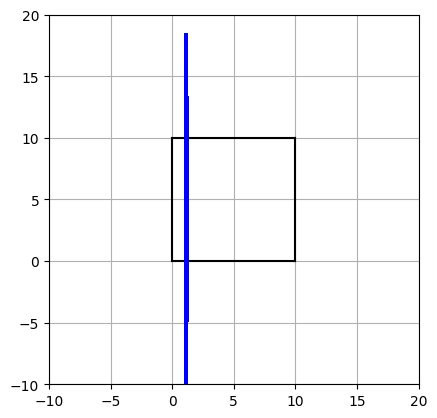

In [11]:
# Value to be plotted
points = (pos(100,1,10,10))

# Box edge coordinates
box = ((0,0),(10,0),(10,10),(0,10),(0,0))

# Setting up plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([-10,20])
ax1.set_ylim([-10,20])
ax1.set_aspect('equal')
plt.grid()

# Generating box outline
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1 = plt.plot(x_vals,y_vals,color='black')
    b += 1

# Generating position coordinates
k = 0
while k < len(points)-1:
    x_values = [points[k][0], points[k+1][0]]
    y_values = [points[k][1], points[k+1][1]]
    ax1 = plt.plot(x_values,y_values,color='blue')
    k += 1
    
plt.show()

I have plotted the positions of the gas particle at each collision. As you can see there is an issue with my pos(T,m,w,h) function as the particle is able to escape this box. It appears that the first collision follows the physical expectation but subsequent collisions oscillate between increaingly more spaced out points outside the box. Further refinement needed.

In [12]:
def pos2(T,m,w,h):
    """
    This function determines the position(s) that a gas particle at an absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width (w) 
    and height (h) in one second. The starting position is random as well as the initial 
    direction.
    
    Inputs:
    T      - absolute temperature of gas (Kelvin)
    m      - mass of gas particle(s) (kg)
    w      - width of box (m)
    h      - height of box (m)
    
    Outputs:
    points - the x and y values of the particle when it reaches the edges of the container
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Initial starting positions defined to be within box's dimensions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Randomly determining components of velocity 
    u = (random.uniform(-1,1)) * s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))

    # Setting up timestep and defining new timer 'total_time'
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Defining position array  
    points = [(x0,y0)]
    
    # Propagation of particle while total time is below 1 second
    while total_time<1:
        
        # Equations of motion
        x = x0 + u*t
        y = y0 + v*t
        
        # Progressing both timers
        t += dt
        total_time += dt
        
        # Boundary conditions (perfectly elastic collisions) 
        # Incrementing collision counters
        # Appending each collision position 
        if x > w-tol:
            points.append((x,y))
            t = 0 # Setting timer t to zero for each collision
            u = -u
            x0 = w-(2*tol)
            y0 = y
        if x < tol:
            points.append((x,y))
            t = 0
            u = -u 
            x0 = 2*tol
            y0 = y
        if y > h-tol:
            points.append((x,y))
            t = 0
            v = -v
            x0 = x
            y0 = h-(2*tol)
        if y < tol:
            points.append((x,y))
            t = 0
            v = -v
            x0 = x
            y0 = 2*tol
            
    return points

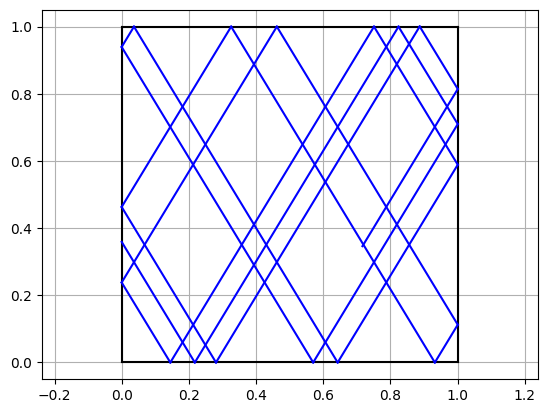

In [13]:
# Value to be plotted
points = (pos2(100,1,1,1))

# Box edge coordinates
box = ((0,0),(1,0),(1,1),(0,1),(0,0))

# Setting up figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([-10,20])
ax1.set_ylim([-10,20])
plt.axis('equal')
plt.grid()

# Generating box outline
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1 = plt.plot(x_vals,y_vals,color='black')
    b += 1

# Generating position coordinates
k = 0
while k < len(points)-1:
    x_values = [points[k][0], points[k+1][0]]
    y_values = [points[k][1], points[k+1][1]]
    ax1 = plt.plot(x_values,y_values,color='blue')
    k += 1
    
plt.show()

I found that all my previous functions were infact using the incorrect equations of motion. In order to fix this I set two time variables; total_time and t. Total_time is a measure of how long the system has been active while t represents the time between each collision. This is important as when a gas particle collides with a boundary it must reverse it's velocity but also change it's starting position donoted at x0 and y0. Therefore t must be set to zero in order to avoid the oscillations pos(T,m,w,h) resulted in.

I will now refine my collision and pressure functions for a single particle to account for this development.

In [14]:
def collision2(T,m,w,h):
    """
    This function determines the number of times a single gas particle at an absolute temperature
    T and mass m collides with the four boundaries of it's 2D container with dimensions width (w)
    and height (h) in one second. The starting position is random as well as the 
    initial direction.
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    
    Outputs:
    p1 - number of collisions with the top of the box
    p2 - number of collisions with the bottom of the box
    p3 - number of collisions with the right side of the box
    p4 - number of collisions with the left side of the box
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Initial starting positions defined to be within box's dimensions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Randomly determining components of velocity 
    u = (random.uniform(-1,1)) * s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))

    # Setting up timestep and defining new timer 'total_time'
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Propagation of particle
    while total_time<1:
        
        # Equations of motion
        x = x0 + u*t
        y = y0 + v*t
        
        # Progressing both timers
        t += dt
        total_time += dt
        
        # Boundary conditions (perfectly elastic collisions) 
        # Incrementing collision counters
        # Appending each collision position 
        if x > w-tol:
            t = 0
            u = -u
            x0 = w-(2*tol)
            y0 = y
            p3 += 1
        if x < tol:
            t = 0
            u = -u
            x0 = 2*tol
            y0 = y 
            p4 += 1
        if y > h-tol:
            t = 0
            v = -v
            x0 = x
            y0 = h-(2*tol)
            p1 += 1
        if y < tol:
            t = 0
            v = -v
            x0 = x
            y0 = 2*tol
            p2 += 1
    
    return p1,p2,p3,p4

In [15]:
collision2(300,1,1,1)

(12, 11, 4, 4)

I am satisfied with the results of the collision2 function.

As before I will now extend my collision2 function to determine the pressure exerted by the gas particle.

In [16]:
def pressure2(T,m,w,h):
    """
    This function determines the pressure exerted on the boundaries of the box due to a gas 
    particle of mass m and absolute temperature T in a box of width w and height h. Pressure 
    is measured in standard units as k_B is set to unity.
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    
    Outputs:
    p - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Generating initial positions
    x0 = random.uniform(tol,w-tol)
    y0 = random.uniform(tol,h-tol)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components
    u = (random.uniform(-1,1))*s
    v = random.choice([-1,1]) * np.sqrt((s**2)-(u**2))

    # Setting up timestep and initializinf timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Propagation of particle
    while total_time<1:
        
        # Equations of motion
        x = x0 + u*t
        y = y0 + v*t
        
         # Progressing both timers
        t += dt
        total_time += dt
        
        # Boundary conditions (perfectly elastic collisions) 
        # + incrementing collision counters
        if x > w-tol:
            t = 0
            u = -u
            x0 = w-(2*tol)
            y0 = y
            p3 += 1
        if x < tol:
            t = 0
            u = -u
            x0 = 2*tol
            y0 = y 
            p4 += 1
        if y > h-tol:
            t = 0
            v = -v
            x0 = x
            y0 = h-(2*tol)
            p1 += 1
        if y < tol:
            t = 0
            v = -v
            x0 = x
            y0 = 2*tol
            p2 += 1
    
    # Calculating pressure exerted
    total_p = ((p1 * 2 * m * abs(v))/ w * dt)
    + ((p2 * 2 * m * abs(v))/ w * dt) 
    + ((p3 * 2 * m * abs(u))/ h * dt)
    + ((p4 * 2 * m * abs(u))/ h * dt)
        
    return total_p

In [17]:
pressure2(1000,1,1,1)

0.057800020402298355

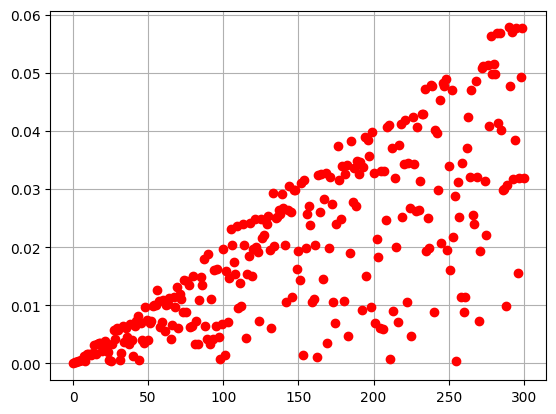

In [18]:
# Defining temperature array
T = np.linspace(0,300,301)
p = []
for i in T:
    p.append(pressure2(i,1,1,1))

# Setting up plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1 = plt.plot(T,p,'o',color='red')
plt.grid()
plt.show()

The value that pressure2(T,m,w,h) outputs depends on dt which is incorrect, therefore I am going to implement a derivative function when calculating pressure to eliminate this. However, for now I am going to focus on generalising my functions for N particles.

### 30/01/21

In [19]:
def collision_N2(T,m,w,h,N):
    """
    This function determines the number of times N gas particle(s) at an absolute temperature 
    T and mass m collide with the four boundaries of the 2D container with dimensions width 
    (w) and height (h) in one second. The starting position(s) are random as well as the 
    particles' initial direction(s).
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    N  - number of particles
    
    Outputs:
    p1 - number of collisions with the top of the box
    p2 - number of collisions with the bottom of the box
    p3 - number of collisions with the right side of the box
    p4 - number of collisions with the left side of the box
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
        
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation 
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Setting up timestep and initializing timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Counters for each wall
    p1 = 0 # Top
    p2 = 0 # Bottom
    p3 = 0 # Right
    p4 = 0 # Left
    
    # Position arrays
    x = []
    y = []
    
    # Looping over each particle individually
    k = 0 # Parameter to label each particle 
    while k < N:
        
        # Propagation of particles
        while total_time<1:
            
            # Equations of motion
            x = x0[k] + u[k]*t
            y = y0[k] + v[k]*t
            
            # Progressing both timers
            t += dt
            total_time += dt

            # Boundary conditions (perfectly elastic collisions) 
            # + incrementing collision counters
            if x > w-tol:
                t = 0
                u[k] = -u[k]
                x0[k] = w-(2*tol)
                y0[k] = y
                p3 += 1
            if x < tol:
                t = 0
                u[k] = -u[k] 
                x0[k] = 2*tol
                y0[k] = y
                p4 += 1
            if y > h-tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = h-(2*tol)
                p1 += 1
            if y < tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = 2*tol
                p2 += 1
        
        # Resetting timer to re-run simulation for next particle
        total_time = 0
        # Incrementing counter to consider next particle
        k += 1
    
    return p1,p2,p3,p4

In [20]:
collision_N2(100,1,1,1,5)

(32, 30, 16, 16)

In order to caluclate the pressure exerted on the box I will have to consider the number of collisions of each particle as well as the velocity of each particle. Therefore I need to improve collision_N2(T,m,w,h,N) so that it outputs the number of collisions for each individual particle.

## 05/02/21

In [21]:
def collision_N3(T,m,w,h,N):
    """
    This function determines the number of times N gas particle(s) at an absolute temperature 
    T and mass m collide with the four boundaries of the 2D container with dimensions width 
    (w) and height (h) in one second. The starting position(s) are random as well as the 
    particles' initial direction(s).
    
    Inputs:
    T  - absolute temperature of gas (Kelvin)
    m  - mass of gas particle(s) (kg)
    w  - width of box (m)
    h  - height of box (m)
    N  - number of particles 
    
    Outputs:
    p1 - number of collisions from each particle with the top of the box
    p2 - number of collisions from each particle with the bottom of the box
    p3 - number of collisions from each particle with the right side of the box
    p4 - number of collisions from each particle with the left side of the box
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Setting up timestep and initializing timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Counters for each wall's collsions with each particle
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    
    # Position arrays
    x = []
    y = []
    
    # Counter to represent number of time the particle that is being considered
    # collides with each wall
    hits1 = 0
    hits2 = 0
    hits3 = 0
    hits4 = 0
    
    # Looping over each particle individually
    k = 0 # Parameter to label each particle 
    while k < N:
        
        # Propagation of particles
        while total_time<1:
            
            # Equations of motion
            x = x0[k] + u[k]*t
            y = y0[k] + v[k]*t
            
            # Progressing each timer
            t += dt
            total_time += dt

            # Boundary conditions (perfectly elastic collisions) 
            # + incrementing collision counters
            if x > w-tol:
                t = 0
                u[k] = -u[k]
                x0[k] = w-(2*tol)
                y0[k] = y
                hits3 += 1 # Incrementing hits counters for each particle
                p3[k] = hits3 # Number of collisions particle 'k' makes with wall
            if x < tol:
                t = 0
                u[k] = -u[k] 
                x0[k] = 2*tol
                y0[k] = y
                hits4 += 1
                p4[k] = hits4
            if y > h-tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = h-(2*tol)
                hits1 += 1
                p1[k] = hits1
            if y < tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = 2*tol
                hits2 += 1
                p2[k] = hits2
        
        # Resetting total time for next particle
        total_time = 0
        
        # Resetting counters for next particle
        hits1 = 0
        hits2 = 0
        hits3 = 0
        hits4 = 0
        
        # Considering next particle
        k += 1
    
    return p1,p2,p3,p4

In [22]:
collision_N3(300,1,1,1,10)

([12, 8, 13, 6, 4, 10, 11, 11, 11, 5],
 [12, 9, 12, 7, 4, 10, 12, 12, 11, 5],
 [3, 9, 1, 11, 12, 8, 5, 4, 6, 14],
 [2, 9, 1, 11, 11, 7, 4, 4, 5, 11])

This updated collisions function outputs the number of times each individual particle collides with a boundary. e.g. the p1 the elements correspond to [particle1 collisions, particle2 collisions, etc.].

This is important as each particle will exert a different amount of pressure on each wall.

I will now attempt to generalise my position function for N particles.

I will also decrease my value of tolerance to increase the precision of when my particles should collide with a boundary.

In [23]:
def pos_N(T,m,w,h,N):
    """
    This function determines the position(s) that gas particle(s) at an absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width 
    (w) and height (h) in one second. The starting position(s) are random as well as the initial 
    direction.
    
    Inputs:
    T      - absolute temperature of gas (Kelvin)
    m      - mass of gas particle
    w      - width of box
    h      - height of box
    N      - number of particles
    
    Outputs:
    points - the x and y values of the particle when it reaches the edges of the container
    
    """
    
    # Setting a smaller tolerance to increase accuracy
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
        
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Setting timestep and initializing timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Position arrays for N particles
    k = 0 
    points = [[(x0[k],y0[k])]]*N
    
    # Looping over each particle individually
    while k < N:
        
        # Propagation of particle
        while total_time<1:
            
            # Equations of motion
            x = x0[k] + u[k]*t
            y = y0[k] + v[k]*t
            
            # Progressing both timers
            t += dt
            total_time += dt
            
            # Boundary conditions (perfectly elastic collisions) 
            # + collecting each position point at collisions
            if x > w-tol:
                points[k].append((x,y))
                t = 0
                u[k] = -u[k]
                x0[k] = w-(2*tol)
                y0[k] = y
            if x < tol:
                points[k].append((x,y))
                t = 0
                u[k] = -u[k] 
                x0[k] = 2*tol
                y0[k] = y
            if y > h-tol:
                points[k].append((x,y))
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = h-(2*tol)
            if y < tol:
                points[k].append((x,y))
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = 2*tol
        
        # Resetting timer for next particle consideration
        total_time = 0
        k += 1
    
    return points

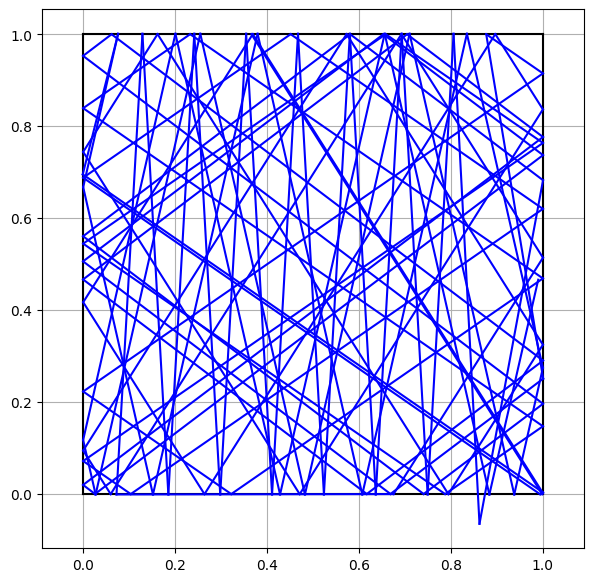

In [24]:
# Setting up parameters for plot
T = 100
m = 1
w = 1
h = 1
N = 5

# Calling pos_N function to generate position points
points = pos_N(T,m,w,h,N)

# Defining box edge coordinates
box = ((0,0),(1,0),(1,1),(0,1),(0,0))

# Setting up plot
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([-10,20])
ax1.set_ylim([-10,20])
plt.axis('equal')
plt.grid()

# Plotting box boundaries
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1.plot(x_vals,y_vals,color='black')
    b += 1

# Generating lines for plotting position coordinates
steps = 0
p = 0
while p < len(points):
    
    while steps < len(points[p])-1:
        xvals = [points[p][steps][0],points[p][steps+1][0]]
        yvals = [points[p][steps][1],points[p][steps+1][1]]
        steps += 1
        ax1.plot(xvals,yvals,color='blue')
    p += 1 

plt.show()

As you can see particles are able to occasionally escape from the box breifly before returning. I am unsure why this is happening.  I will return to this at a later date to try and correct it but for now the model furfills it's purpose of determining the pressure that the gas exerts on it's container.

In [25]:
def pressure_N(T,m,w,h,N):
    """
    This function determines the pressure exerted on the boundaries of the box due to 
    gas particle(s) of mass m and absolute temperature T in a box of width w and height h within
    1 second. Pressure is measured in standard units as k_B is set to unity.
    
    Inputs:
    T - absolute temperature of gas (Kelvin)
    m - mass of gas particle
    w - width of box
    h - height of box
    N - number of particles in gas
    
    Outputs:
    p - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
     
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []

    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)

    # Setting timestep and initializing timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Counters for each wall's collsions with each particle
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    
    # Position arrays
    x = []
    y = []
    
    # Counter to represent number of time the particle that is being considered
    # collides with each wall
    hits1 = 0
    hits2 = 0
    hits3 = 0
    hits4 = 0
    
    # Looping over each particle individually
    k = 0 
    while k < N:
        
        # Propagation of particle
        while total_time<1:
            
            # Equations of motion
            x = x0[k] + u[k]*t
            y = y0[k] + v[k]*t
            
            # Progressing both timers
            t += dt
            total_time += dt
            
            # Boundary conditions (perfectly elastic collisions) 
            # + incrementing collision counters
            if x > w-tol:
                t = 0
                u[k] = -u[k]
                x0[k] = w-(2*tol)
                y0[k] = y
                hits3 += 1 # Incrementing hits counter for each particle
                p3[k] = hits3 # Number of collisions particle 'k' makes with wall
            if x < tol:
                t = 0
                u[k] = -u[k] 
                x0[k] = 2*tol
                y0[k] = y
                hits4 += 1
                p4[k] = hits4
            if y > h-tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = h-(2*tol)
                hits1 += 1
                p1[k] = hits1
            if y < tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = 2*tol
                hits2 += 1
                p2[k] = hits2
        
        # Resetting total timer and hits counter for next particle
        total_time = 0
        hits1 = 0
        hits2 = 0
        hits3 = 0
        hits4 = 0
        k += 1
    
    # Defining pressure on each wall counters
    total_p1 = 0
    total_p2 = 0
    total_p3 = 0
    total_p4 = 0
    
    # Looping over each particle and calculating pressure
    l = 0
    while l < N:
        total_p1_next = ((p1[l] * 2 * m * abs(v[l]))/ w * dt)
        total_p1 += total_p1_next
        
        total_p2_next = ((p2[l] * 2 * m * abs(v[l]))/ w * dt) 
        total_p2 += total_p2_next
        
        total_p3_next = ((p3[l] * 2 * m * abs(u[l]))/ h * dt)
        total_p3 += total_p3_next
        
        total_p4_next = ((p4[l] * 2 * m * abs(u[l]))/ h * dt)
        total_p4 += total_p4_next
        
        l += 1
    
    # Summation of each wall's pressure
    total_p = total_p1 + total_p2 + total_p3 + total_p4
    
    return total_p

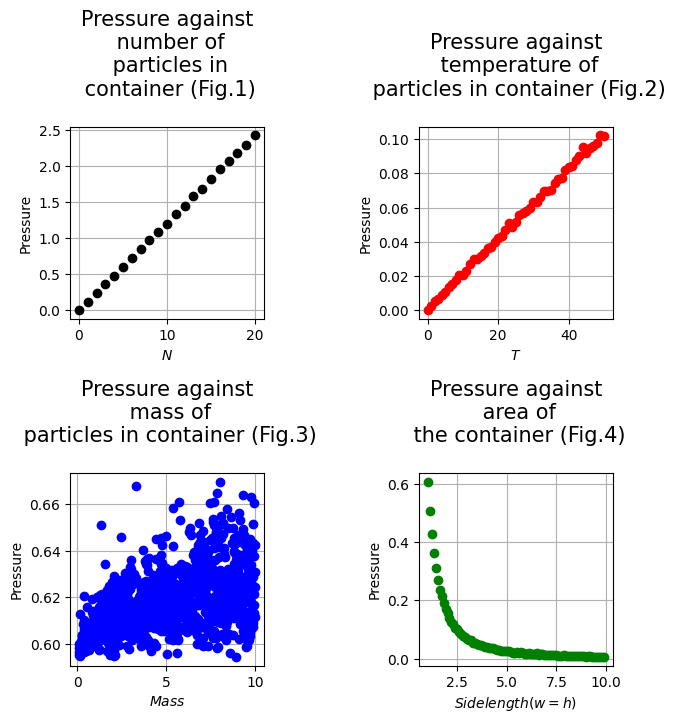

CPU times: user 23.8 s, sys: 61 ms, total: 23.8 s
Wall time: 24 s


In [26]:
%%time

# Defining parameters for comparison plot
T1 = 300
m1 = 1
w1 = 1
h1 = 1

N1 = np.arange(0,21,1)
p1 = []

# Determining pressure for each set of parameters
v = 0
while v < len(N1):
    p1_next = pressure_N(T1,m1,w1,h1,N1[v])
    p1.append(p1_next)
    v += 1

# Defining parameters for comparison plot
m2 = 1
w2 = 1
h2 = 1
N2 = 5

T2 = np.arange(0,51,1)
p2 = []

# Determining pressure for each set of parameters
z = 0
while z < len(T2):
    p2_next = pressure_N(T2[z],m2,w2,h2,N2)
    p2.append(p2_next)
    z += 1

# Defining parameters for comparison plot
T3 = 300
w3 = 1
h3 = 1
N3 = 5

m3 = np.arange(0.1,10,0.01)
p3 = []

# Determining pressure for each set of parameters
a = 0
while a < len(m3):
    p3_next = pressure_N(T3,m3[a],w3,h3,N3)
    p3.append(p3_next)
    a += 1

# Defining parameters for comparison plot
T4 = 300
m4 = 1
N4 = 5

w4 = np.arange(1,10,0.1)
h4 = np.arange(1,10,0.1)
p4 = []

# Determining pressure for each set of parameters
f = 0
while f < len(w4):
    p4_next = pressure_N(T4,m4,w4[f],h4[f],N4)
    p4.append(p4_next)
    f += 1
    
    
# Plotting all four comparisons    
fig = plt.figure(figsize=(7,7))
fig.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(N1,p1,'o',color='black')
ax1.set_xlabel(r'$N$',size=10)
ax1.set_ylabel("Pressure",size=10)
ax1.set_title("Pressure against\n number of\n particles in\n container (Fig.1)\n",size=15)
plt.grid()

ax2 = fig.add_subplot(2,2,2)
ax2.plot(T2,p2,'o',color='red')
ax2.set_xlabel(r'$T$',size=10)
ax2.set_ylabel("Pressure",size=10)
ax2.set_title("Pressure against\n temperature of\n particles in container (Fig.2)\n",size=15)
plt.grid()

ax3 = fig.add_subplot(2,2,3)
ax3.plot(m3,p3,'o',color='blue')
ax3.set_xlabel(r'$Mass$',size=10)
ax3.set_ylabel("Pressure",size=10)
ax3.set_title("Pressure against\n mass of\n particles in container (Fig.3)\n",size=15)
plt.grid()

ax4 = fig.add_subplot(2,2,4)
ax4.plot(w4,p4,'o',color='green')
ax4.set_xlabel(r'$Side length (w=h)$',size=10)
ax4.set_ylabel("Pressure",size=10)
ax4.set_title("Pressure against\n area of\n the container (Fig.4)\n",size=15)
plt.grid()

plt.subplots_adjust(wspace=0.8,hspace=0.8)

plt.show()

These four plots illustrate the variation of pressure due to the change in the number of particles, temperature, mass and sidelength.

Fig.1 - shows how the number of particles in the gas is directly proportional to the pressure exerted on the boundaries.

Fig.2 - illustrates how the temperature of the gas is directly proportional to the pressure of the gas.

Fig.3 - shows a much weaker correlation than the other figures but the trend in the data points show how increasing the mass of the particles generally increases the pressure.

Fig.4 - as the both of the sides increase, there is a decrease in pressure corresponding to a $1/x^2$ curve. This follows the theory as the area of the boundaries is inversely proportional to the pressure.

This cell takes ~2 minutes to run due to the high number of particle interactions being considered, I may need to increase the timestep to account for this.

## 07/02/2021

I am going to refine my system to include the piston's interaction with the gas.

In [27]:
def piston_height(T,m_gas,m_piston,w,h_initial,h0,N):
    """
    This function determines the piston's height at each timestep (within 1 second) 
    while attached to a box containing gas particle(s) with mass m and absolute temperature T 
    in a box of width w and height h.
    
    Inputs:
    T         - absolute temperature of gas (Kelvin)
    m_gas     - mass of gas particle (kg)
    m_piston  - mass of piston (kg)
    w         - width of box (m)
    h_initial - initial maximum height of gas particles (m)
    h0        - initial height of piston (above bottem of box) (m)
    N         - number of particles in gas
    
    Outputs:
    h         - array of piston's height at each timestep (m)
    time      - array of time incrementations (s)
    
    """
    
    # Gravitational acceleration constant
    g = 9.81
    
    # Setting a tolerance for collision definitions
    tol = 1e-5
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h_initial-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equation 
    s = np.sqrt((2*k_B*T)/m_gas)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Setting timestep and initializing timers
    dt = 1e-4
    t = 0
    total_time = 0
    
    # Single counter for piston collisions
    p1 = [0]*N
    
    # Position arrays
    x = []
    y = []
    
    # Height and time arrays
    h = [h0]
    time = [0]
    
    # Defining parameter to loop over particles
    k = 0 
    
    # Defining parameter to loop over number of piston collisions
    q = 0
    
    # Looping over each particle individually
    while k < N:
        
        # Propagation of particles
        while total_time<1:
            
            # Equations of motion
            x = x0[k] + u[k]*t
            y = y0[k] + v[k]*t
            
            # Progressing both timers
            t += dt
            total_time += dt
            
            # Boundary conditions (perfectly elastic collisions) 
            # + collecting each position point at collisions
            # + collecting piston height points
            if x > w-tol:
                t = 0
                u[k] = -u[k]
                x0[k] = w-(2*tol)
                y0[k] = y
                
            if x < tol:
                t = 0
                u[k] = -u[k] 
                x0[k] = 2*tol
                y0[k] = y
            
            # Condition for piston's change in velocity upon collision
            if y > h[q]-tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = h[q]-(2*tol)
                total_f1 = 0
                total_f1_next = ((2 * m_gas * abs(v[k]))/ dt)
                total_f1 += total_f1_next
                force_on_piston = -m_piston*g + total_f1
                piston_acceleration = (force_on_piston)/(m_piston)
                h_next = (0.5)*(piston_acceleration)*(total_time)**2
                h.append(h_next)
                time.append(total_time)
                q += 1
                
            if y < tol:
                t = 0
                v[k] = -v[k]
                x0[k] = x
                y0[k] = 2*tol
        
        total_time = 0
        k += 1
    
    return np.array([h,time])

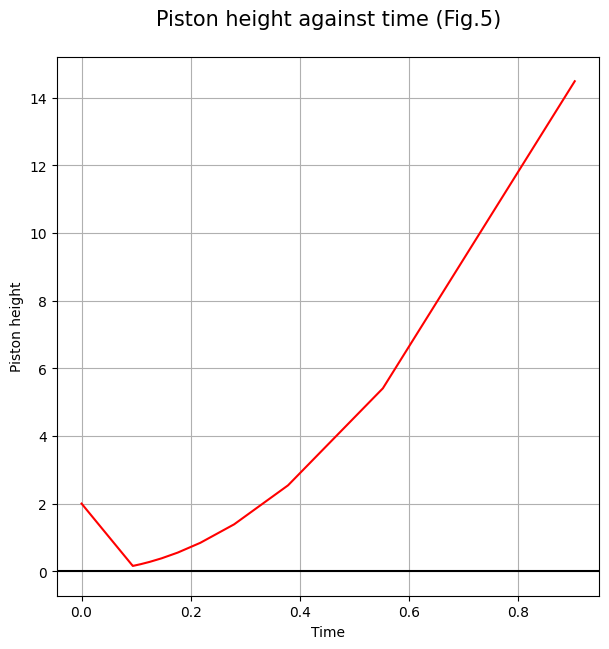

In [28]:
# Calling piston_height fucntion for position and time values
vals = piston_height(300,1,10000,1,1,2,1)

# Setting up plot for piston's height
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time",size=10)
ax1.set_ylabel("Piston height",size=10)
ax1.set_title("Piston height against time (Fig.5)\n",size=15)
ax1.axhline(color='black')
ax1.plot(vals[1],vals[0],color='red')
plt.grid()
plt.show()

I have encountered an issue with my piston's equation of motion as the piston should not shoot off upwards.

I also need to find a way for all the particles to run at the same time as the piston's height is time dependent so I need to find a way for all the particles to run in the same timeframe.

The following is purely experimental as I was familiarizing myself with numpy arrays.

In [29]:
tol = 1e-5
    
x0 = []
w = 1
N = 2
for i in range(0,N):
    n1 = random.uniform(tol,w-tol)
    x0.append(n1)

In [30]:
x0

[0.4434918051181402, 0.8844818855240597]

In [31]:
T = 300
m_gas = 1
k_B = 1
s = np.sqrt((2*k_B*T)/m_gas)
    
N = 2
u = []
    
for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)

In [32]:
u

[-22.140463337497618, -13.562192588383564]

In [33]:
x0 = np.array(x0)
u = np.array(u)
t = 0
dt = 1
t = t + dt

In [34]:
x = x0 + u*dt
print(x)

[-21.69697153 -12.6777107 ]


In [35]:
for i in range(x.shape[0]):
    if x[i] < -9.2+0.2:
        u[i] = -1*u[i]

print(u)

[22.14046334 13.56219259]


In [36]:
print(x.shape)

(2,)


Spoke with Johannes 09/02/21 about changing particle position coding technique.

## 15/02/21

In [37]:
def pos_N2(T,m,w,h,N,total_time):
    """
    This function determines the position(s) that gas particle(s) at absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width (w) 
    and height (h) in the total time. The starting position(s) are random as well as the 
    initial direction(s).
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    N          - number of particles
    total_time - time for simulation to run (s)
    
    Outputs:
    points     - the x and y values of the particle when it reaches the edges of the container
    
    """
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
        
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equations
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Position arrays
    x1 = [x0]
    y1 = [y0]
    
    # Propagation of particle
    while t < total_time:
        
        # Equations of motion
        x = x0 + u*dt
        y = y0 + v*dt
        
        # Progressing timer
        t += dt
        
        # Re-initializing starting positions for each timestep
        x0 = x
        y0 = y
        
        # Documenting new postions
        x1.append(x)
        y1.append(y)
        
        # Boundary conditions (perfectly elastic collisions)
        if x < tol:            
            x0 = x
            u = -u
        if x > w-tol:
            x0 = x
            u = -u
        if y < tol:
            y0 = y
            v = -v
        if y > h-tol:
            y0 = y
            v = -v
    
    return x1,y1

Note this function takes 'N' as a parameter but is just meant to consider N=1 for simplicity.

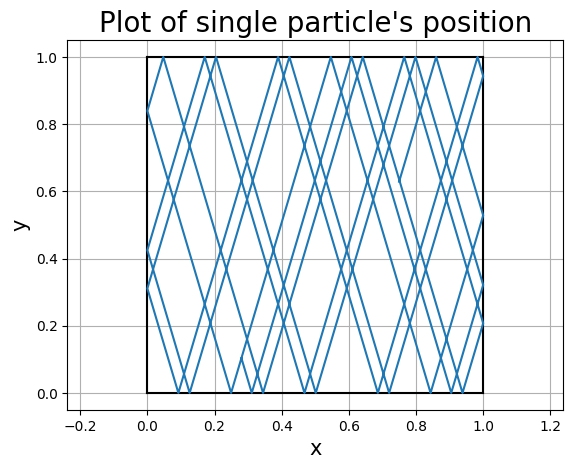

In [38]:
# Setting up plot to test function
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.axis('equal')
plt.grid()

# Defining box edges
box = ((0,0),(1,0),(1,1),(0,1),(0,0))

# Plotting box outline
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1 = plt.plot(x_vals,y_vals,color='black')
    b += 1

# Generating position plot
vals = pos_N2(300,1,1,1,1,1)
ax1 = plt.plot(vals[0],vals[1])
plt.xlabel(r'x', size=15)
plt.ylabel(r'y', size=15)
plt.title("Plot of single particle's position", size=20 )

plt.show()

This plot is now accurate so I will proceed to generalise mt position function for N particles.

I will also decrease the time-step to 10^-5s to increase the accuracy of my simulations. 

Spoke with Johannes 16/02/21 about correcting my motion equations.

## 17/02/21

In [39]:
def pos_N3(T,m,w,h,N,total_time):
    """
    This function determines the position(s) that gas particle(s) at absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width (w) 
    and height (h) in the total time. The starting position(s) are random as well as the 
    initial direction(s).
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    N          - number of particles
    total_time - time for simulation to run (s)
    
    Outputs:
    points     - the x and y values of the particle when it reaches the edges of the container
    
    """
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
        
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equations
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Defining position arrays with intial positon values
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagation of particle
    while t < total_time:
        
        # Considering each particle
        for i in range(N):
            
            # Equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Documenting new postions
            x[i].append(x_next)
            y[i].append(y_next)

            # Boundary conditions (perfectly elastic collisions)
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
            
        # Incrementing timer
        t += dt
    
    return x,y

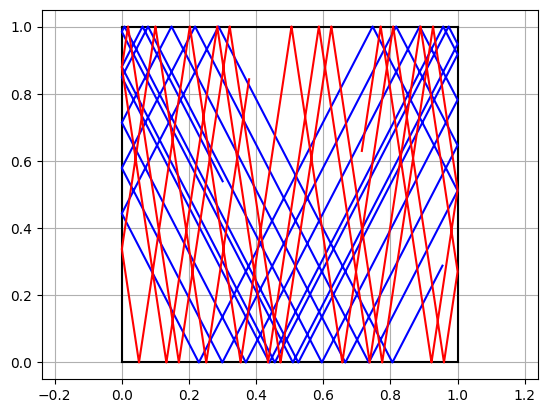

In [40]:
# Setting up plot to test function
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# Defining box edges
box = ((0,0),(1,0),(1,1),(0,1),(0,0))

# Generating box outlines
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1 = plt.plot(x_vals,y_vals,color='black')
    b += 1

# Calling position function to generate particle path
points = pos_N3(300,1,1,1,2,1)

# Generating particles' paths
ax1 = plt.plot(points[0][0],points[1][0],color='blue')
ax1 = plt.plot(points[0][1],points[1][1],color='red')
plt.axis('equal')
plt.grid()
plt.show()

I have changed the order of the loops in the motion equation to allow each particle's position to be considered for each time step independently.

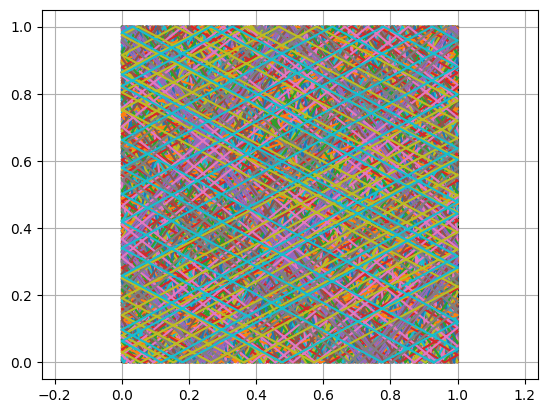

CPU times: user 10.3 s, sys: 375 ms, total: 10.7 s
Wall time: 10.8 s


In [41]:
%%time
# Defining parameters for plot
T = 300
m = 1
w = 1
h = 1
N = 100
total_time = 1

# Setting up plot
fig2 = plt.figure()
ax1 = fig2.add_subplot(1,1,1)

# Defining box outlines
box = ((0,0),(w,0),(w,h),(0,h),(0,0))

# Generating box outlines
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    ax1 = plt.plot(x_vals,y_vals,color='black')
    b += 1

# Calling position function to determine plotting points
points = pos_N3(T,m,w,h,N,total_time)

# Determining particles' paths
for i in range(N):
    ax1 = plt.plot(points[0][i],points[1][i])
    
plt.axis('equal')
plt.grid()
plt.show()

I can now plot the paths of N particles.

Using my new function for position (pos_N3) I will re-write my pressure equation.

In [42]:
def collision_N4(T,m,w,h,N,total_time):
    """
    This function determines the position(s) that a gas particle at an absolute temperature T 
    and mass m collides with the four boundaries of it's 2D container with dimensions width (w) 
    and height (h) in one second. The starting position(s) are random as well as the 
    initial direction(s).
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    N          - number of particles
    total_time - time for simulation to run (s)
    
    Outputs:
    points - the x and y values of the particle when it reaches the edges of the container
    
    """
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equations
    s = np.sqrt((2*k_B*T)/m)
    
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Position arrays using initial position values
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Counters for each wall's collsions with each particle
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagation of particle
    while t < total_time:
        
        # Considering each particle in system
        for i in range(N):
            
            # Equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Documenting new postions
            x[i].append(x_next)
            y[i].append(y_next)

            # Boundary conditions (perfectly elastic collisions)
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
                p4[i] += 1
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
                p3[i] += 1
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
                p2[i] += 1
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
                p1[i] += 1
        
        # Incrementing timer
        t += dt
    
    return p1,p2,p3,p4

In [43]:
collision_N4(300,1,1,1,10,1)

([12, 10, 10, 12, 9, 12, 9, 11, 11, 12],
 [12, 10, 10, 11, 10, 12, 10, 11, 11, 12],
 [3, 7, 7, 5, 8, 3, 7, 6, 6, 1],
 [2, 7, 7, 5, 8, 3, 8, 5, 6, 1])

I have adapted my collision function to show the number of collisions each particle makes with each wall. I will also take an average of the pressure across the total time which is a new input parameter.

In [44]:
def pressure_N2(T,m,w,h,N,total_time):
    """
    This function determines the pressure exerted on the boundaries of the box due to 
    gas particle(s) of mass m and absolute temperature T in a box of width w and height h within
    a specified timeframe. Pressure is measured in standard units as k_B is set to unity.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    N          - number of particles in gas
    total_time - time for simulation to run (s)
    
    Outputs:
    p          - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Average speed equations
    s = np.sqrt((2*k_B*T)/m)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s**2)-(u[i]**2))
        v.append(n4)
        
    # Defining initial postions and velocities as numpy arrays    
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Defining position arrays for each particle
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Counters for each wall's collsions with each particle
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagation of particles
    while t < total_time:
        
        # Considering each particle in system
        for i in range(N):
            
            # Equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Documenting new postions
            x[i].append(x_next)
            y[i].append(y_next)

            # Boundary conditions (perfectly elastic collisions) 
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
                p4[i] += 1
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
                p3[i] += 1
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
                p2[i] += 1
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
                p1[i] += 1
                
        # Incrementing timer
        t += dt
    
    # Pressure counters
    pressure1 = 0
    pressure2 = 0
    pressure3 = 0
    pressure4 = 0
    
    # Summation of pressure exerted by each particle
    # Note I am taking an average over the total time
    for i in range(N):
        pressure1_next = (p1[i] * 2 * m * abs(v[i]))/(w * total_time)
        pressure1 += pressure1_next
        
        pressure2_next = (p2[i] * 2 * m * abs(v[i]))/(w * total_time)
        pressure2 += pressure2_next
    
        pressure3_next = (p3[i] * 2 * m * abs(u[i]))/(h * total_time)
        pressure3 += pressure3_next
        
        pressure4_next = (p4[i] * 2 * m * abs(u[i]))/(h * total_time)
        pressure4 += pressure4_next
        
    # Summing all pressures
    total_pressure = pressure1 + pressure2 + pressure3 + pressure4 
    
    return total_pressure

In [45]:
pressure_N2(300,100,1,1,1,1)

979.0034529140563

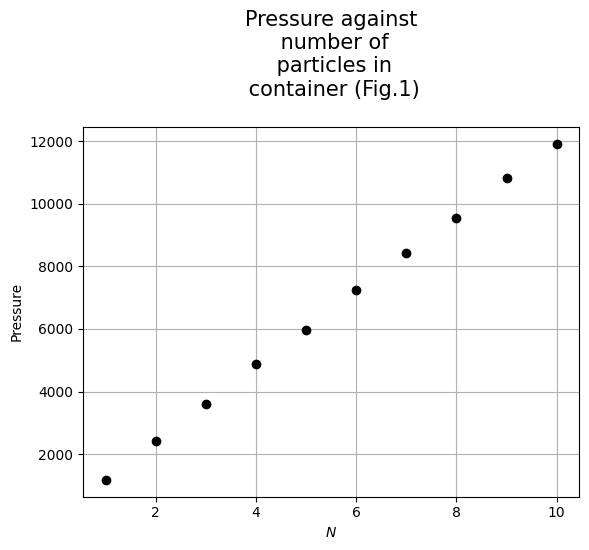

CPU times: user 4.55 s, sys: 109 ms, total: 4.66 s
Wall time: 4.67 s


In [46]:
%%time

# Defining parameters for pressure function
total_time = 1

T1 = 300
m1 = 1
w1 = 1
h1 = 1

N1 = np.arange(1,11,1)

p1 = []

# Calling pressure function to for each set of parameters
for i in range(max(N1)):
    p1_next = pressure_N2(T1,m1,w1,h1,N1[i],total_time)
    p1.append(p1_next)  

# Generating plot
plt.plot(N1,p1,'o',color='black')
plt.xlabel(r'$N$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n number of\n particles in\n container (Fig.1)\n",size=15)
plt.grid()
plt.show()

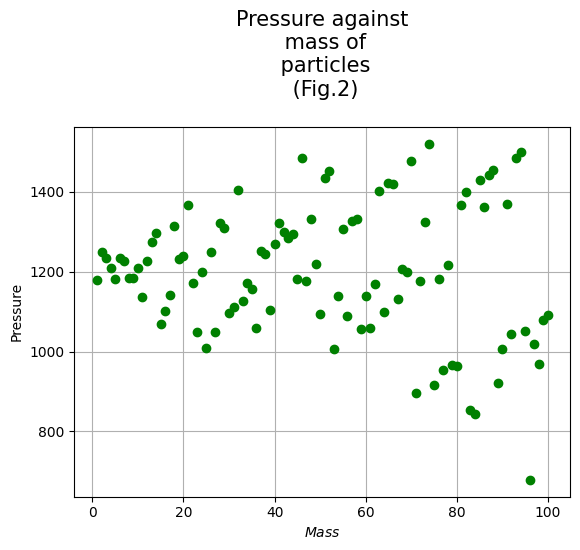

CPU times: user 9.63 s, sys: 14.1 ms, total: 9.65 s
Wall time: 9.72 s


In [47]:
%%time

# Defining parameters for pressure function
total_time = 1

T2 = 300
w2 = 1
h2 = 1
N2 = 1

m2 = np.arange(1,101,1)

p2 = []

# Calling pressure function to for each set of parameters
for i in range(max(m2)):
    p2_next = pressure_N2(T2,m2[i],w2,h2,N2,total_time)
    p2.append(p2_next)  

# Generating plot 
plt.plot(m2,p2,'o',color='green')
plt.xlabel(r'$Mass$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n mass of\n particles\n (Fig.2)\n",size=15)
plt.grid()
plt.show()

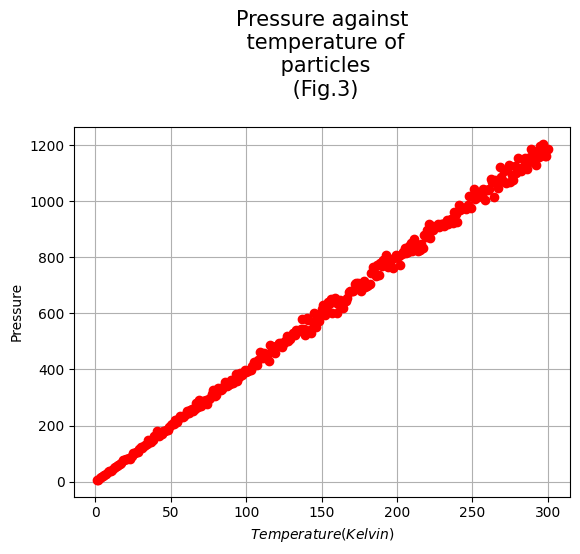

CPU times: user 28.5 s, sys: 31.1 ms, total: 28.6 s
Wall time: 28.6 s


In [48]:
%%time

# Defining parameters for pressure function
total_time = 1

m3 = 1
w3 = 1
h3 = 1
N3 = 1

T3 = np.arange(1,301,1)

p3 = []

# Calling pressure function to for each set of parameters
for i in range(max(T3)):
    p3_next = pressure_N2(T3[i],m3,w3,h3,N3,total_time)
    p3.append(p3_next)  

# Generating plot
plt.plot(T3,p3,'o',color='red')
plt.xlabel(r'$Temperature (Kelvin)$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n temperature of\n particles\n (Fig.3)\n",size=15)
plt.grid()
plt.show()

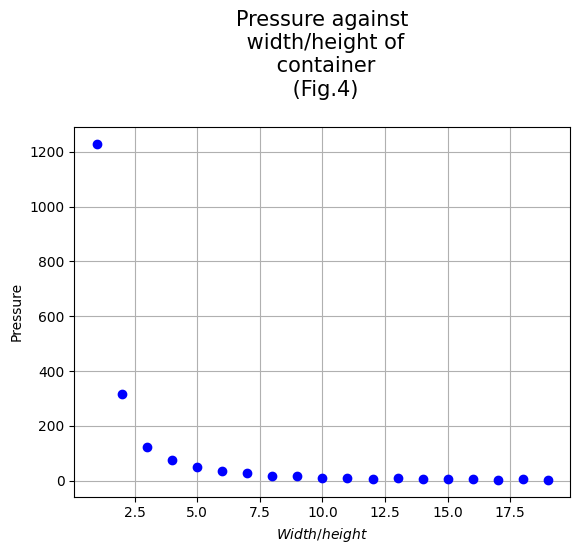

CPU times: user 6.74 s, sys: 18.9 ms, total: 6.76 s
Wall time: 6.78 s


In [49]:
%%time

# Defining parameters for pressure function
total_time = 1

T4 = 300
m4 = 1
N4 = 1

w_h4 = np.arange(1,20,1)

p4 = []

# Calling pressure function to for each set of parameters
for i in range(max(w_h4)):
    p4_next = pressure_N2(T4,m4,w_h4[i],w_h4[i],N4,total_time)
    p4.append(p4_next)  

# Generating plot
plt.plot(w_h4,p4,'o',color='blue')
plt.xlabel(r'$Width/height$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n width/height of\n container\n (Fig.4)\n",size=15)
plt.grid()
plt.show()

I am satisfied with these thermodynamic relations that I have recovered.

Spoke with Johannes on 19/02/21 about fixing the mass correlation issue by implementing the Maxwell-Boltzmann distribution when generating particles' velocities.

## 19/02/21

I am going to implement the 2D Maxwell-Boltzmann distribution.

In [50]:
def M_B_2D(T, m, s):
    """
    This function plots the 2D Maxwell-Boltzmann distribution.
    
    Inputs:
    T    - temperature of gas (K) 
    m    - mass of gas particles (kg)
    s    - speed of gas particles (ms^-1)
    
    Outputs:
    prob - probability of a gas particle possessing a speed
    
    """
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Defining useful expression
    sigma = np.sqrt((k_B*T)/m)
    
    # MB 2D equation
    prob = ((s)/(sigma**2))*np.exp(-((s**2)/(2*(sigma**2))))
    
    return prob

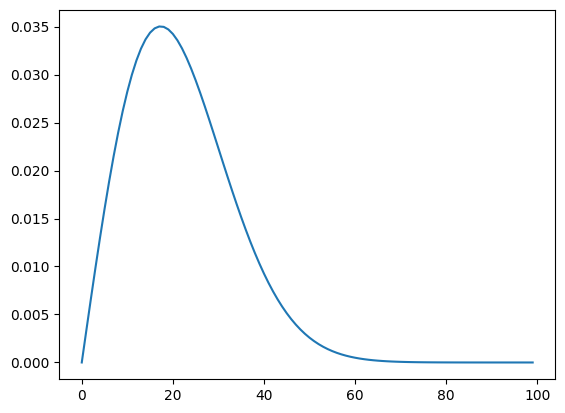

In [51]:
# Setting up parameters for plot
T = 300
m = 1
s = np.arange(0,100,1)

# Plotting MB2D curve
vals = M_B_2D(T, m, s)
plt.plot(s, vals)
plt.show()

In [52]:
# Checking the curve is normalised
integrate.simps(vals,s)

0.9999994107294851

In [53]:
# Experimenting to test validity of plot
M_B_2D(T,m,24.5)

0.030030972183374062

In [54]:
# Note this was purely to re-familiarise myself with PDFs
def coin_toss(N):
    heads = 0
    tails = 0
    prob = [0]*N
    for i in range(N):
        prob[i] = np.random.uniform(-1,1)
        if prob[i] > 0:
            heads+=1
        else:
            tails+=1
    return heads,tails

In [55]:
coin_toss(10000)

(4946, 5054)

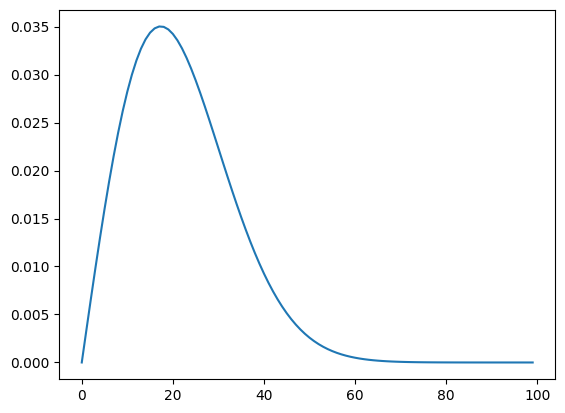

In [56]:
# Re-plotting MB2D curve
T = 300
m = 1
s = np.arange(0,100,1)

vals_curve = M_B_2D(T, m, s)
plt.plot(s, vals_curve)
plt.show()

In [57]:
def MB_speed(T,m,N):
    """
    This function generates particle velocities according to the the 2D Maxwell-Boltzmann 
    distribution.
    
    Inputs:
    T    - temperature of gas (K) 
    m    - mass of gas particles (kg)
    N    - number of velocities to generate
    
    Outputs:
    speeds - N length array of fitted speeds (ms^1)
    
    """
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Defining useful expression
    sigma = np.sqrt((k_B*T)/m)
    
    # Random number [0,1]
    U = np.random.rand(N)
    
    speeds = []
    
    # Determining N random speeds fitted to MB2D curve
    for i in range(N):
        speeds_next = np.sqrt(abs(np.log(U[i]))*2*(sigma**2)) 
        speeds.append(speeds_next)
    return speeds

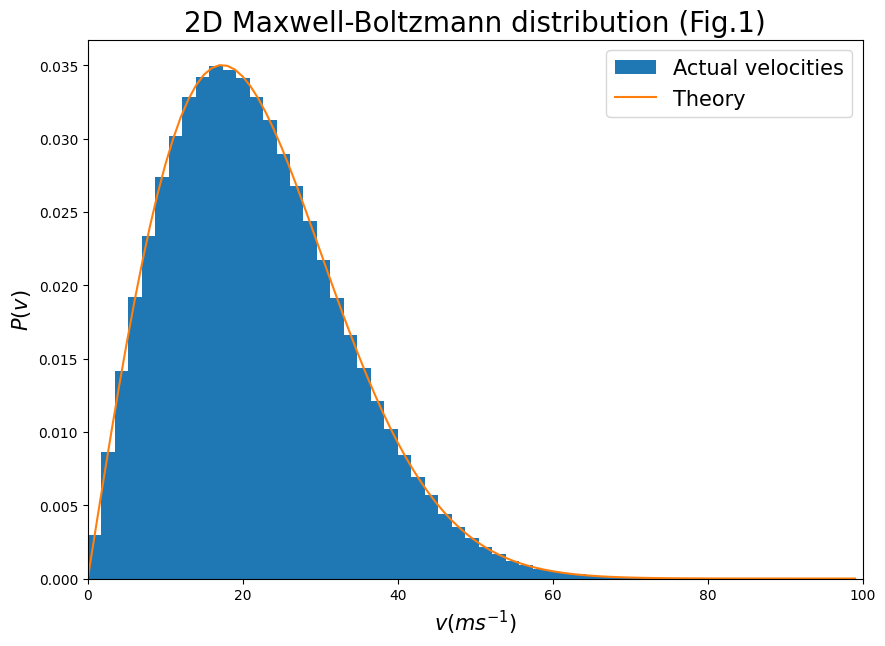

In [58]:
# Plotting histogram and theory curve of MB2D
N = 1000000
vals = MB_speed(300,1,N)

#################################################
# Note this is an alternative plot for generating 
# the points on the MB2D curve as a CDF.
#
# vals2 = np.rint(vals)
#
# list0 = []
#
# for i in range(100):
#     nextval = np.count_nonzero(vals2 == i)
#     list0.append(nextval)
#
# plt.plot(list0,'o',label="Actual Speeds")
#################################################

# Setting up figure
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

# Plotting histogram of velocities
ax1.hist(vals,bins=50,density=True,label="Actual velocities")
ax1.set_xlim([0,100])
ax1.set_title("2D Maxwell-Boltzmann distribution (Fig.1)",size=20)
ax1.set_xlabel(r'$v(ms^{-1})$',size=15)
ax1.set_ylabel(r'$P(v)$',size=15)
ax1.plot(s, vals_curve,label="Theory")
ax1.legend(fontsize=15)
plt.show()

### Note from this point, any saved figure will appear in my final report.

In [59]:
# Option to save figure as a PDF
fig.savefig('2DM-Bdist.pdf')

In [60]:
# Testing validity of MB2D function
T = 300
k_B = 1
m = 1
sigma = np.sqrt((k_B*T)/m)
values = MB_speed(T,m,100)
itr = 0
for i in range(100):
    if values[i] > 5  and values[i] < 95 :
        itr += 1
print(itr)

98


I have written a function that takes the inverse cumulative distribution function and outputs the speed of each particle according to the Maxwell-Boltzmann distribution.

In [61]:
def pressure_MB(T,m,w,h,N,total_time):
    """
    This function determines the pressure exerted on the boundaries of the box due to 
    gas particle(s) of mass m and absolute temperature T in a box of width w and height h within
    1 second. Pressure is measured in standard units as k_B is set to unity.The velocities of
    the particles are distributed according to the Maxwell-Boltzmann 2D distribution.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    N          - number of particles in gas
    total_time - simulation time
    
    
    Outputs:
    p          - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Useful expression
    sigma = np.sqrt((k_B*T)/m)
    
    # Random number [0,1] for each particle
    U = np.random.rand(N)
    s = []
    
    # Determining each particle's magnitude of velocity
    for i in range(N):
        s_next = np.sqrt(abs(np.log(U[i]))*2*(sigma**2))
        s.append(s_next)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1) * s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Counters for each wall
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagation of particles
    while t < total_time:
        
        # Looping over each particle individually
        for i in range(N):
            
            # Equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Documenting new postions
            x[i].append(x_next)
            y[i].append(y_next)

            # Boundary conditions (perfectly elastic collisions)
            # + collecting number of collision
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
                p4[i] += 1
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
                p3[i] += 1
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
                p2[i] += 1
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
                p1[i] += 1
                
        # Incrementing timer
        t += dt
    
    # Pressure counters
    pressure1 = 0
    pressure2 = 0
    pressure3 = 0
    pressure4 = 0
    
    # Summation of pressure exerted by each particle
    for i in range(N):
        pressure1_next = (p1[i] * 2 * m * abs(v[i]))/(w * total_time)
        pressure1 += pressure1_next
        
        pressure2_next = (p2[i] * 2 * m * abs(v[i]))/(w * total_time)
        pressure2 += pressure2_next
    
        pressure3_next = (p3[i] * 2 * m * abs(u[i]))/(h * total_time)
        pressure3 += pressure3_next
        
        pressure4_next = (p4[i] * 2 * m * abs(u[i]))/(h * total_time)
        pressure4 += pressure4_next
       
    # Summing each pressure contribution
    total_pressure = pressure1 + pressure2 + pressure3 + pressure4 
    
    return total_pressure

### Be aware from this point onwards some plots may take an excessive time to run. This is an area I will address in the final report.

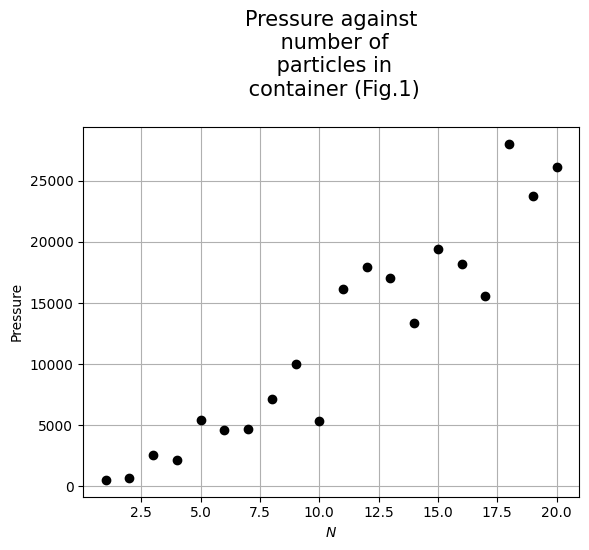

CPU times: user 16.9 s, sys: 429 ms, total: 17.3 s
Wall time: 17.4 s


In [62]:
%%time
# Setting up parameters to determine pressure
total_time = 1

T1 = 300
m1 = 1
w1 = 1
h1 = 1

N1 = np.arange(1,21,1)

p1 = []

# Determining pressure for each set of parameters
for i in range(max(N1)):
    p1_next = pressure_MB(T1,m1,w1,h1,N1[i],total_time)
    p1.append(p1_next)  

# Plotting pressure figures
plt.plot(N1,p1,'o',color='black')
plt.xlabel(r'$N$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n number of\n particles in\n container (Fig.1)\n",size=15)
plt.grid()
plt.show()

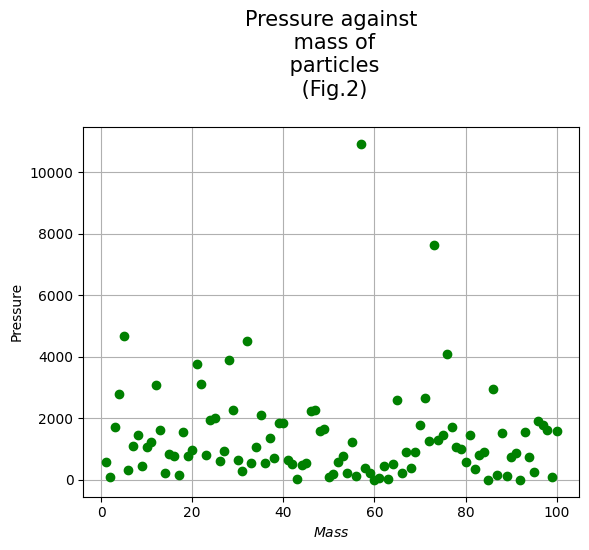

CPU times: user 9.62 s, sys: 4.98 ms, total: 9.63 s
Wall time: 9.66 s


In [63]:
%%time
# Setting up parameters to determine pressure
total_time = 1

T2 = 300
w2 = 1
h2 = 1
N2 = 1

m2 = np.arange(1,101,1)

p2 = []

# Determining pressure for each set of parameters
for i in range(max(m2)):
    p2_next = pressure_MB(T2,m2[i],w2,h2,N2,total_time)
    p2.append(p2_next)  

# Plotting pressure figure   
plt.plot(m2,p2,'o',color='green')
plt.xlabel(r'$Mass$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n mass of\n particles\n (Fig.2)\n",size=15)
plt.grid()
plt.show()

Still getting no correlation - will explore this further in the final report.

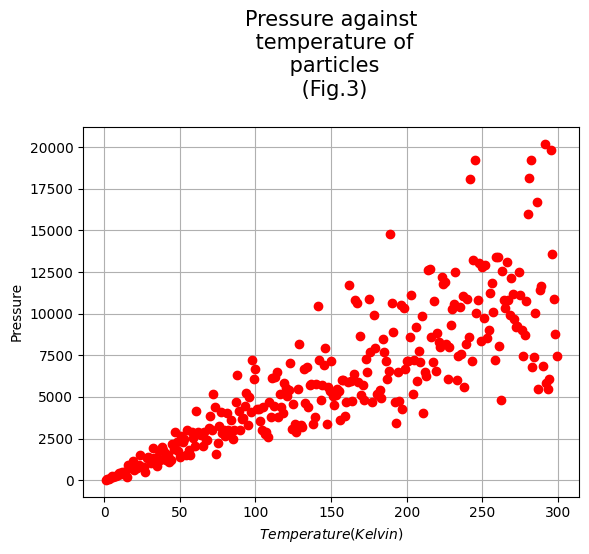

CPU times: user 4min 1s, sys: 486 ms, total: 4min 1s
Wall time: 4min 2s


In [64]:
%%time
# Setting up parameters to determine pressure
total_time = 1

m3 = 1
w3 = 1
h3 = 1
N3 = 10

T3 = np.arange(1,300,1)

p3 = []

# Determining pressure for each set of parameters
for i in range(max(T3)):
    p3_next = pressure_MB(T3[i],m3,w3,h3,N3,total_time)
    p3.append(p3_next)  

# Plotting pressure figures
plt.plot(T3,p3,'o',color='red')
plt.xlabel(r'$Temperature (Kelvin)$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n temperature of\n particles\n (Fig.3)\n",size=15)
plt.grid()
plt.show()

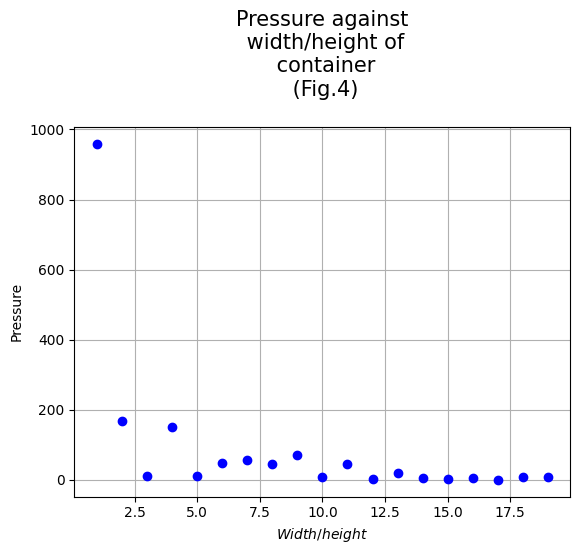

CPU times: user 6.7 s, sys: 3.01 ms, total: 6.7 s
Wall time: 6.72 s


In [65]:
%%time
# Setting up parameters to determine pressure
total_time = 1

T4 = 300
m4 = 1
N4 = 1

w_h4 = np.arange(1,20,1)

p4 = []

# Determining pressure for each set of parameters
for i in range(max(w_h4)):
    p4_next = pressure_MB(T4,m4,w_h4[i],w_h4[i],N4,total_time)
    p4.append(p4_next)  
    
plt.plot(w_h4,p4,'o',color='blue')
plt.xlabel(r'$Width/height$',size=10)
plt.ylabel("Pressure",size=10)
plt.title("Pressure against\n width/height of\n container\n (Fig.4)\n",size=15)
plt.grid()
plt.show()

Using the MB distribution has added a lot of experimental noise to the plots as the particles now move with random velocities and therefore will vary between each simulation.

I am going to write a function to determine the piston's height. Using the ammendments I have made to my pressure function.

In [66]:
def piston_height2(T,m,m_piston,w,h,h0,N,total_time):
    """
    This function determines the piston's height (starting at h0) at each timestep 
    (within total_time) while attached to a box containing gas particle(s) with mass m and 
    absolute temperature T in a box of width w and height h.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    m_piston   - mass of piston (kg)
    w          - width of box (m)
    h          - initial maximum height of gas particles (m)
    h0         - initial height of piston (above bottem of box) (m)
    N          - number of particles in gas
    total_time - simulation time (s)
    
    Outputs:
    h          - array of piston's height at each timestep (m)
    time       - array of time incrementations (s)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to zero
    k_B = 1
    
    # Defining useful expression
    sigma = np.sqrt((k_B*T)/m)
    
    # Generating random number [0,1] for each particle
    U = np.random.rand(N)
    
    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt(abs(np.log(U[i]))*2*(sigma**2))
        s.append(s_next)

    # Allocating random velocity components to each particle
    u = []
    
    # Setting y-component to zero to simplify function temporarily
    for i in range(0,N):
        #n3 = random.uniform(-1,1) * s[i]
        u.append(0)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Gravitational acceleration constant
    g = 9.81
    
    # Defining timestep and initializing timer (larger timestep for simplicity)
    t = 0
    dt = 1e-2
    
    # Setting up lists for piston's attributes
    height = []
    v_piston = []
    p_piston = []
    KE_piston = []
    time = []
    
    # Propagation of piston's motion
    while t < total_time:
        
        # Considering each particle
        for i in range(N):
            
            # Piston equations of motion (initially without gravity for simplicity)
            v_piston_next = -0.1
            p_piston_next = -m_piston*0.1
            KE_piston_next = (1/2)*(m_piston)*(v_piston_next**2)
            height_next = h0 + v_piston_next*dt
            
            # Re-initializing starting positions for each timestep
            h0 = height_next
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Updating particle and piston quantity lists
            x[i].append(x_next)
            y[i].append(y_next)
            height.append(height_next)
            v_piston.append(v_piston_next)
            p_piston.append(p_piston_next)
            KE_piston.append(KE_piston_next)
            
            # Boundary conditions (perfectly elastic collisions)
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            
            # Condition for particle-piston collision
            # Change in piston's velocity
            if y_next > height_next-tol:
                y0[i] = y_next
                v[i] = -v[i]
                
                # Result from conservation of linear momentum
                v_piston_next = ((2*m*abs(v[i]))/m_piston)
                v_piston.append(v_piston_next)
                
                # Documenting next height value
                h0 = height_next
                height_next = h0 + v_piston_next*dt
                height.append(height_next)
                
                # Documenting time of collision
                time.append(t)
        
        # Progressing timer
        t += dt
        
        # Documenting each timestep
        time.append(t)

    return time,height

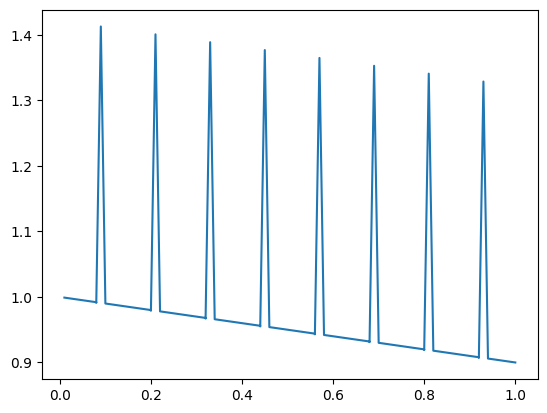

In [67]:
# Defining initial parameters for test
T = 300
m = 1
m_piston = 1
w = 1
h = 1
h0 = 1
N = 1
total_time = 1

# Callinf piston height function to determine heigths
vals = piston_height2(T,m,m_piston,w,h,h0,N,total_time)

# Setting up plot
plt.plot(vals[0],vals[1])
plt.show()

I need to revise my piston's equation of motion as I am aware this plot is inaccurate.

Spoke with Shaun Boodram 21/02/21 about coding outline.

Spoke with Johannes 23/02/21 about piston equation.

I have research some aspects of momentum conservation that I was unsure of [1] and I am now going to make the appropirate changed to the piston's height equation. Also, the Session 7 notes [2] have given me some insight into what form my piston equation of motion should take.

## 26/02/21

In [68]:
def piston_height3(T,m,m_piston,w,h,h0,N,total_time):
    """
    This function determines the piston's height (starting at h0) at each timestep 
    (within total_time) while attached to a box containing gas particle(s) with mass m 
    and absolute temperature T in a box of width w and height h.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    m_piston   - mass of piston (kg)
    w          - width of box (m)
    h          - initial maximum height of gas particles (m)
    h0         - initial height of piston (above bottem of box) (m)
    N          - number of particles in gas
    total_time - simulation time (s)
    
    Outputs:
    h          - array of piston's height at each timestep (m)
    time       - array of time incrementations (s)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
    
    # Setting Boltzmann constant to zero
    k_B = 1
    
    # Defining useful expression
    sigma = np.sqrt((k_B*T)/m)
    
    # Generating random number [0,1] for each particle
    U = np.random.rand(N)
    
    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt(abs(np.log(U[i]))*2*(sigma**2))
        s.append(s_next)

    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1) * s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2))
        v.append(n4)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    u = np.array(u)
    v = np.array(v)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    # Gravitational acceleration constant
    g = 9.81
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Defining piston quantities lists
    height = []
    v_piston = []
    time = []
    v_next = 0
    
    # Propagation of piston's and particles' motions
    while t < total_time:
        
        # Piston equations of motion
        v_next = v_next - (g*dt)
        v_piston.append(v_next)
            
        height_next = h0 + (v_next*dt) - (0.5)*(g)*(dt**2)
        height.append(height_next)
    
        # Re-initializing starting positions for each timestep
        h0 = height_next
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            
            # Updating particles' positons
            x[i].append(x_next)
            y[i].append(y_next)

            # Boundary conditions (perfectly elastic collisions)
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            
            # Piston collision conditions
            if y_next > height_next-tol:
                y0[i] = y_next
                v[i] = -v[i]
                
                # Piston velocity change due to momemtum conservation
                v_next = v_next + (2*m*abs(v[i]))/m_piston
                v_piston.append(v_next)
                
                # Piston's height equation after collision
                height_next = h0 + v_next*dt + (dt**2)*((2*m_piston*abs(v[i]))/(2*m_piston))
                height.append(height_next)
                h0 = height_next
                
                # Progressing timer
                t += dt
                
                # Documenting each timestep
                time.append(t)

        # Progressing timer         
        t += dt
        
        # Documenting each timestep
        time.append(t)

    return time,height

## 02/03/21

I will now plot the results of my piston height equation and observe whether they match my expectation.

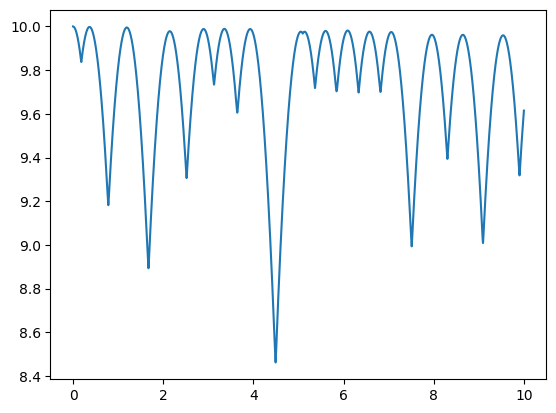

CPU times: user 9.06 s, sys: 242 ms, total: 9.31 s
Wall time: 9.34 s


In [69]:
%%time

# Setting up parameters for testing function
T = 100
m = 1
m_piston = 2000
w = 10
h = 9
h0 = 10
N = 10
total_time = 10

# Determining piston heights
vals = piston_height3(T,m,m_piston,w,h,h0,N,total_time)

# Setting up plot
plt.plot(vals[0],vals[1])
plt.show()

This is an improvement as these paths are beginning to match my expectations of an oscillating height. I may need to ammend the equations of motion as I am unsure whether this equations are correct.

Spoke with Johannes (02/03/21) about piston height function.

I am now going to extend my functions to 3D.

I will write a function that outputs the particles' position, pressure exerted and piston height by combining my previous functions. Firstly I will write a 3D position function. I will need to use the 3D Maxwell-Boltzmann distribution.

In [70]:
def M_B_3D(T,m,s):
    """
    This function plots the 3D Maxwell-Boltzmann distribution.
    
    Inputs:
    T    - temperature of gas (K) 
    m    - mass of gas particles (kg)
    s    - speed of gas particles (ms^-1)
    
    Outputs:
    prob - probability of a gas particle possessing a speed
    
    """
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Determining probability of a particle possessing each speed
    prob = (4*np.pi)*((m/(2*np.pi*k_B*T))**(1.5))*(s**2)*np.exp(-(m*(s**2))/(2*k_B*T))
    
    return prob

In [71]:
def MB_speed3D(T,m,N):
    """
    This function generates particle velocities according to the the 3D Maxwell-Boltzmann 
    distribution.
    
    Inputs:
    T    - temperature of gas (K) 
    m    - mass of gas particles (kg)
    N    - number of random velocities to generate
    
    Outputs:
    speeds - N length array of fitted speeds (ms^1)
    
    """
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # N random numbers [0,1] to determine N speeds
    U = np.random.uniform(0,1,N)
    
    # Determining N speeds for each particle by fitting speeds to 
    # Maxwell-Boltzmann 3D distribution
    speeds = []
    for i in range(N):
        
        # Utalising SciPy function to determine speeds
        speeds_next = np.sqrt((T*k_B)/m)*maxwell.ppf(U[i])
        speeds.append(speeds_next)
        
    return speeds

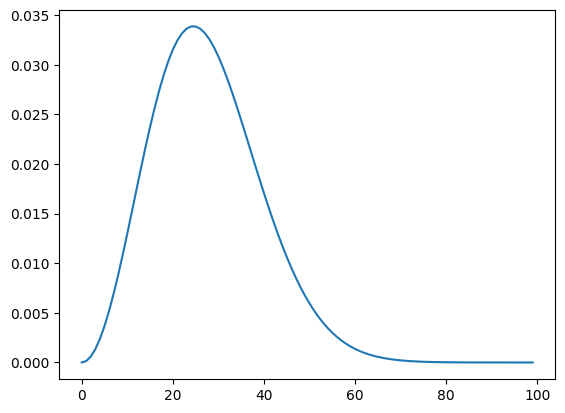

In [72]:
# Defining parameters for plot
T = 300
m = 1
s = np.arange(0,100,1)

# Plotting theory curve
vals_curve3D = M_B_3D(T,m,s)
plt.plot(s, vals_curve3D)
plt.show()

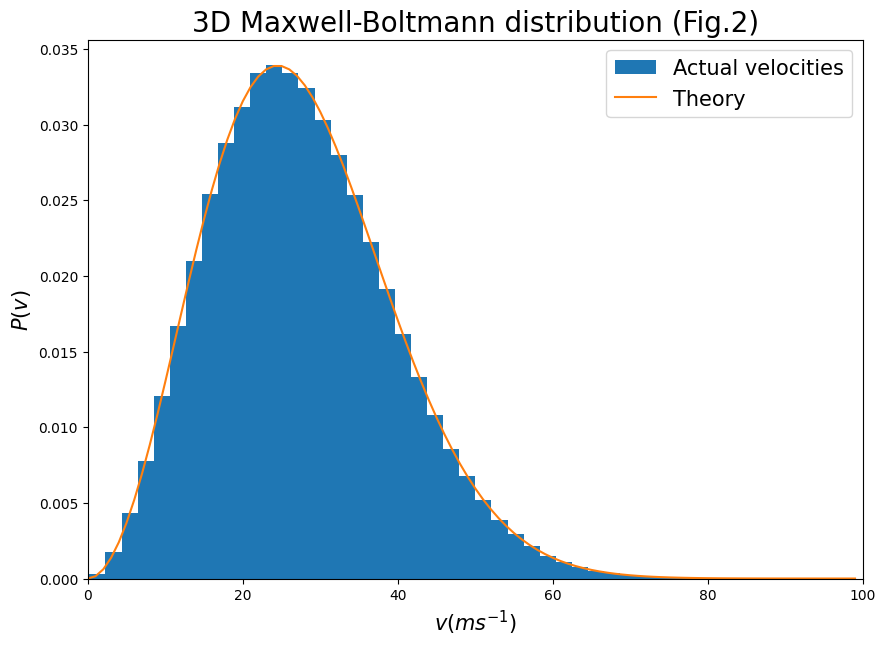

In [73]:
N = 1000000
vals = MB_speed3D(300,1,N)

############################################################
# Note this is an alternative plot for generating the points
# on the MB3D curve as a CDF
#
# vals2 = np.rint(vals)
#
# list1 = []
#
# for i in range(100):
#     nextval = np.count_nonzero(vals2 == i)
#     list1.append(nextval)
#
# plt.plot(list1,'o',label="Actual Speeds")
###########################################################

# Setting up histogram plot
fig2 = plt.figure(figsize=(10,7))
ax1 = fig2.add_subplot(111)
ax1.set_title("3D Maxwell-Boltmann distribution (Fig.2)",size=20)
ax1.hist(vals,bins=50,density=True,label="Actual velocities")
ax1.set_xlim([0,100])
ax1.plot(s, vals_curve3D,label="Theory")
ax1.set_xlabel(r'$v(ms^{-1})$',size=15)
ax1.set_ylabel(r'$P(v)$',size=15)
plt.legend(fontsize=15)
plt.show()

In [74]:
# Option to save figure as a PDF
fig2.savefig('3DM-Bdist.pdf')

I am unable to write a function for the 3D Maxwell-Boltzmann velocities as the CDF is not inversible so I am cannot determine an inverse.

I have now realised that this is an inbuilt SciPy function so I have adapted it accordingly.

In [75]:
def pos_3D(T,m,w,h,d,N,total_time):
    """
    This function determines the position(s) (at regular intervals) of gas particle(s) at 
    absolute temperature T and mass m as they collide with the six boundaries of their 3D 
    container with dimensions width (w), height (h) and depth (d) within the total time. 
    Their starting position(s) are random as well as the initial direction(s) and the velocities 
    are fitted to the 3D Maxwell Boltzmann distribution.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    d          - depth of box (m)
    N          - number of particles
    total_time - time for simulation to run (s)
    
    Outputs:
    x          - horizontal position component (m)
    y          - vertical position component (m)
    z          - depth position component (m)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
     
    z0 = []
    
    for i in range(0,N):
        n5 = random.uniform(tol,d-tol)
        z0.append(n5)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Generating random number [0,1-tol] for each particle 
    U = np.random.uniform(0,1-tol,N) # To avoid infinite value
    
    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt((T*k_B)/m)*maxwell.ppf(U[i])
        s.append(s_next)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.uniform(-1,1)*np.sqrt(s[i]**2-u[i]**2)
        v.append(n4)
        
    k = []
    
    for i in range(0,N):
        n6 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2)-(v[i]**2))
        k.append(n6)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    z0 = np.array(z0)
    u = np.array(u)
    v = np.array(v)
    k = np.array(k)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    z = []
    
    for i in range(N):
        z.append([z0[i]])
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagation of piston's and particles' motion
    while t < total_time:
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            z_next = z0[i] + k[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            z0[i] = z_next
            
            # Documenting particles' positions 
            x[i].append(x_next)
            y[i].append(y_next)
            z[i].append(z_next)
            
            # Boundary conditions (perfectly elastic collisions)
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
            if z_next < tol:
                z0[i] = z_next
                k[i] = -k[i]
            if z_next > d-tol:
                z0[i] = z_next
                k[i] = -k[i]
            
        # Progressing timer
        t += dt
    
    return x,y,z    

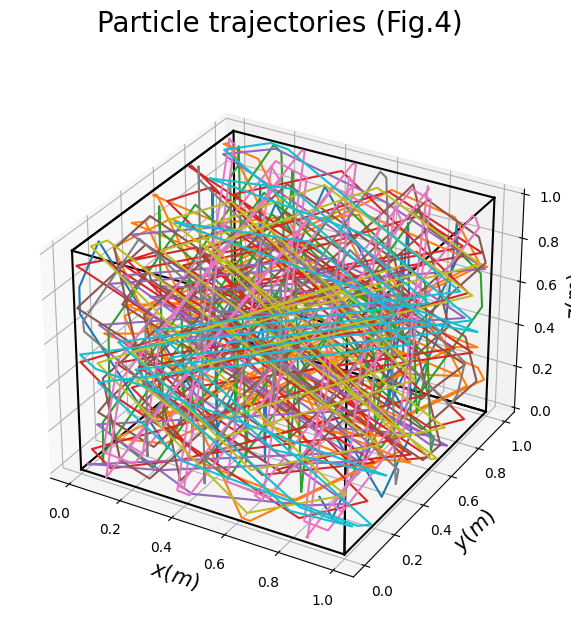

In [76]:
# Setting up parameters for position plot
T = 300
m = 1
w = 1
h = 1
d = 1
N = 10
total_time = 1

# Setting up figure for plot
fig4 = plt.figure(figsize=(10,7))
ax1 = fig4.add_subplot(111,projection='3d')
ax1.set_title("Particle trajectories (Fig.4)\n",size=20)
ax1.set_xlabel(r'$x(m)$',size=15)
ax1.set_ylabel(r'$y(m)$',size=15)
ax1.set_zlabel(r'$z(m)$',size=15)

# Defining 3D box's outline
box = ((0,0,0),(w,0,0),(w,h,0),(0,h,0),(0,0,0),(0,0,d),(0,h,d),(0,h,0),(w,h,0),(w,h,d),(0,h,d)
       ,(0,0,d),(h,0,d),(w,0,0),(w,0,d),(w,h,d))

# Generating plot of box outline
b = 0
while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    z_vals = [box[b][2], box[b+1][2]]
    ax1 = plt.plot(x_vals,y_vals,z_vals,color='black')
    b += 1

# Calling position function to generate plot
points = pos_3D(T,m,w,h,d,N,total_time)

# Plotting particles' paths
for i in range(N):
    ax1 = plt.plot(points[0][i],points[1][i],points[2][i])
    
plt.grid()
plt.show()

In [77]:
# Option to save figure as a PDF
fig4.savefig('3DPosPlot.pdf')

I am satisfied with these results.

I will now alter my pos3D function in order to show three snap-shots of a particle-wall collision. (Note this is purely in order to generate a figure for the final report)

In [78]:
def test_pos3D(T,m,w,h,d,N,total_time):
    """
    ***TEST FUNCTION***
    
    This function determines the position(s) (at regular intervals) of gas particle(s) at 
    absolute temperature T and mass m as they collide with the six boundaries of their 3D 
    container with dimensions width (w), height (h) and depth (d) within the total time. 
    Their starting position(s) are random as well as the initial direction and the velocities 
    are fitted to the 3D Maxwell Boltzmann distribution.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    d          - depth of box (m)
    N          - number of particles
    total_time - time for simulation to run (s)
    
    Outputs:
    x          - horizontal particle position components (m)
    y          - vertical particle position components (m)
    z          - depth particle position components (m)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Intial position coordinates
    x0 = [0.5]
    y0 = [0.01]
    z0 = [0.5]
    
    # Velocity components
    u = [1]
    v = [1]  
    k = [0]
    
    # Defining initial postions and velocities as numpy arrays 
    x0 = np.array(x0)
    y0 = np.array(y0)
    z0 = np.array(z0)
    u = np.array(u)
    v = np.array(v)
    k = np.array(k)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    z = []
    
    for i in range(N):
        z.append([z0[i]])
    
    # Defining timestep and initializing timer
    t = 0
    dt = 0.01
    
    # Propagation of particle motion
    while t < total_time:
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            z_next = z0[i] + k[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            z0[i] = z_next
            
            # Documenting particles' positions
            x[i].append(x_next)
            y[i].append(y_next)
            z[i].append(z_next)
            
            # Boundary conditions (perfectly elastic collisions) 
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
            if z_next < tol:
                z0[i] = z_next
                k[i] = -k[i]
            if z_next > d-tol:
                z0[i] = z_next
                k[i] = -k[i]
        
        # Progressing timer    
        t += dt
    
    return x,y,z

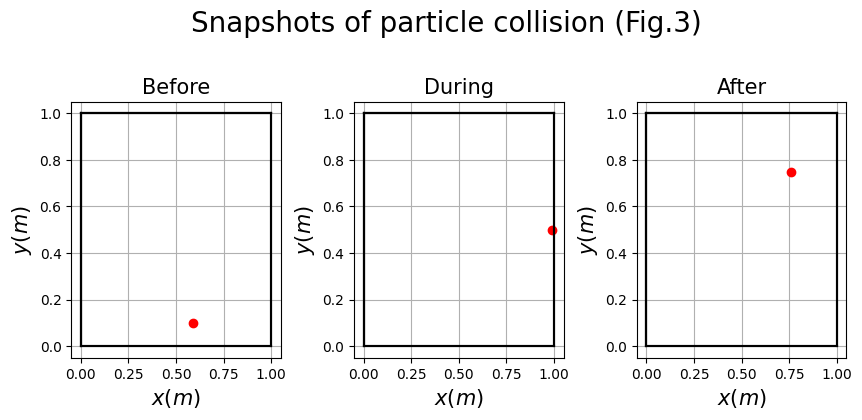

In [79]:
# Setting up parameters for test plot
T = 300
m = 1
w = 1
h = 1
d = 1
N = 1
total_time = 2

# Position values for test plot
vals = test_pos3D(T,m,w,h,d,N,total_time)

# Setting pup figure
fig3 = plt.figure(figsize=(10,4))
fig3.suptitle('Snapshots of particle collision (Fig.3)\n\n',size=20)
fig3.tight_layout()
fig3.subplots_adjust(top=0.75,wspace=0.35,hspace=0.5)

# Before collision plot
ax1 = fig3.add_subplot(131)
ax1.set_title("Before",size=15)
ax1.set_xlabel(r'$x(m)$',size=15)
ax1.set_ylabel(r'$y(m)$',size=15)

ax1.plot(vals[0][0][9:10],vals[1][0][9:10],'ro')
ax1.grid()

# During collision plot
ax2 = fig3.add_subplot(132)
ax2.set_title("During",size=15)
ax2.set_xlabel(r'$x(m)$',size=15)
ax2.set_ylabel(r'$y(m)$',size=15)

ax2.plot(vals[0][0][49:50],vals[1][0][49:50],'ro')
ax2.grid()

# After collision plot
ax3 = fig3.add_subplot(133)
ax3.set_title("After",size=15)
ax3.set_xlabel(r'$x(m)$',size=15)
ax3.set_ylabel(r'$y(m)$',size=15)

ax3.plot(vals[0][0][74:75],vals[1][0][74:75],'ro')
ax3.grid()

# 3D box outline
box = ((0,0,0),(w,0,0),(w,h,0),(0,h,0),(0,0,0),(0,0,d),(0,h,d),(0,h,0),(w,h,0),(w,h,d),(0,h,d)
       ,(0,0,d),(h,0,d),(w,0,0),(w,0,d),(w,h,d))

b = 0

while b < len(box)-1:
    x_vals = [box[b][0], box[b+1][0]]
    y_vals = [box[b][1], box[b+1][1]]
    z_vals = [box[b][2], box[b+1][2]]
    ax1.plot(x_vals,y_vals,color='black')
    ax2.plot(x_vals,y_vals,color='black')
    ax3.plot(x_vals,y_vals,color='black')
    b += 1

In [80]:
# Option to save figure as a PDF
fig3.savefig('2DSteps.pdf')

I have projected these figure in 2D (x-y plane) for clarity.

I will now re-write my pressure equation.

In [81]:
def pressure_3D(T,m,w,h,d,N,total_time):
    """
    This function determines the pressure exerted on the boundaries of the box in 3D due to 
    gas particle(s) of mass m and absolute temperature T in the box of width w, height h and
    depth d within the total time. Pressure is measured in standard units as k_B is set to unity.
    The velocities of the particles are distributed according to the 
    Maxwell-Boltzmann 3D distribution.
    
    Inputs:
    T          - absolute temperature of gas (Kelvin)
    m          - mass of gas particle (kg)
    w          - width of box (m)
    h          - height of box (m)
    d          - depth of box (m)
    N          - number of particles in gas
    total_time - simulation time (s)
    
    Outputs:
    p          - total pressure (s.u.)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
     
    z0 = []
    
    for i in range(0,N):
        n5 = random.uniform(tol,d-tol)
        z0.append(n5)
    
    # Setting Boltzmann constant to unity
    k_B = 1
    
    # Generating random number [0,1-tol] for each particle
    U = np.random.uniform(0,1-tol,N) # To avoid infinite value
    
    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt((T*k_B)/m)*maxwell.ppf(U[i])
        s.append(s_next)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.uniform(-1,1)*np.sqrt(s[i]**2-u[i]**2)
        v.append(n4)
        
    k = []
    
    for i in range(0,N):
        n6 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2)-(v[i]**2))
        k.append(n6)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    z0 = np.array(z0)
    u = np.array(u)
    v = np.array(v)
    k = np.array(k)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    z = []
    
    for i in range(N):
        z.append([z0[i]])
    
    # Counters for each wall
    p1 = [0]*N # Top
    p2 = [0]*N # Bottom
    p3 = [0]*N # Right
    p4 = [0]*N # Left
    p5 = [0]*N # Front
    p6 = [0]*N # Back
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Propagating particles' motion
    while t < total_time:
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            z_next = z0[i] + k[i]*dt
            
            # Re-initializing starting positions for each timestep 
            x0[i] = x_next
            y0[i] = y_next
            z0[i] = z_next
            
            # Documenting particle position at each timestep
            x[i].append(x_next)
            y[i].append(y_next)
            z[i].append(z_next)
            
            # Boundary conditions (perfectly elastic collisions)
            # + collecting each position point at collisions
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
                p4[i] += 1
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
                p3[i] += 1
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
                p2[i] += 1
            if y_next > h-tol:
                y0[i] = y_next
                v[i] = -v[i]
                p1[i] += 1
            if z_next < tol:
                z0[i] = z_next
                k[i] = -k[i]
                p5[i] += 1
            if z_next > d-tol:
                z0[i] = z_next
                k[i] = -k[i]
                p6[i] += 1
            
        # Incrementing timer
        t += dt
    
    # Pressure counter
    pressure1 = 0
    pressure2 = 0
    pressure3 = 0
    pressure4 = 0
    pressure5 = 0
    pressure6 = 0
    
    # Summation of pressure on each wall from every particle
    for i in range(N):
        pressure1_next = (p1[i] * 2 * m * abs(v[i]))/(w * d * total_time)
        pressure1 += pressure1_next
        
        pressure2_next = (p2[i] * 2 * m * abs(v[i]))/(w * d * total_time)
        pressure2 += pressure2_next
    
        pressure3_next = (p3[i] * 2 * m * abs(u[i]))/(h * d * total_time)
        pressure3 += pressure3_next
        
        pressure4_next = (p4[i] * 2 * m * abs(u[i]))/(h * d * total_time)
        pressure4 += pressure4_next
        
        pressure5_next = (p5[i] * 2 * m * abs(k[i]))/(h * w * total_time)
        pressure5 += pressure5_next
        
        pressure6_next = (p6[i] * 2 * m * abs(k[i]))/(h * w * total_time)
        pressure6 += pressure6_next
        
    # Summing all pressure contributions    
    total_pressure = pressure1 + pressure2 + pressure3 + pressure4 + pressure5 + pressure6
    
    return total_pressure

In [82]:
# Defining model exponential function for fitting
def Exp(x,m,t,b):
    return m * np.exp(-t * x) + b

In [83]:
%%time

# Setting up plotting parameters
total_time = 1

T1 = 300
m1 = 1
w1 = 1
h1 = 1
d1 = 1

N1 = np.arange(0,21,1)
p1 = []

# Calculating pressure for each set of parameters
v = 0
while v < len(N1):
    p1_next = pressure_3D(T1,m1,w1,h1,d1,N1[v],total_time)
    p1.append(p1_next)
    v += 1

# Setting up plotting parameters
m2 = 1
w2 = 1
h2 = 1
d2 = 1
N2 = 50

T2 = np.arange(300,401,10)
p2 = []

# Calculating pressure for each set of parameters
z = 0
while z < len(T2):
    p2_next = pressure_3D(T2[z],m2,w2,h2,d2,N2,total_time)
    p2.append(p2_next)
    z += 1
     
# Setting up plotting parameters
T3 = 300
w3 = 1
h3 = 1
d3 = 1
N3 = 10

m3 = np.arange(0.1,10,0.1)
p3 = []

# Calculating pressure for each set of parameters
a = 0
while a < len(m3):
    p3_next = pressure_3D(T3,m3[a],w3,h3,d3,N3,total_time)
    p3.append(p3_next)
    a += 1

# Setting up plotting parameters
T4 = 300
m4 = 1
N4 = 10

w4 = np.arange(1,10,0.1)
h4 = np.arange(1,10,0.1)
d4 = np.arange(1,10,0.1)
p4 = []

# Calculating pressure for each set of parameters
f = 0
while f < len(w4):
    p4_next = pressure_3D(T4,m4,w4[f],h4[f],d4[f],N4,total_time)
    p4.append(p4_next)
    f += 1

CPU times: user 5min 16s, sys: 2.73 s, total: 5min 19s
Wall time: 5min 20s


In [84]:
# Line of best fit
degree1 = 1
fit1,cov1 = np.polyfit(N1,p1,degree1,cov=True) # Ensuring error is outputted too
line1 = np.poly1d(fit1)
x1 = np.linspace(0,20,len(N1))
y1 = line1(x1)

# Line of best fit
degree2 = 1
fit2,cov2 = np.polyfit(T2,p2,degree2,cov=True)
line2 = np.poly1d(fit2)
x2 = np.linspace(300,400,len(T2))
y2 = line2(x2)

# Exponential fitted curve
guess = (10,10,1)
parameters, cov3 = scipy.optimize.curve_fit(Exp,w4,p4,guess)
m, t, b = parameters

/tmp/ipykernel_81770/3215734088.py:3: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b


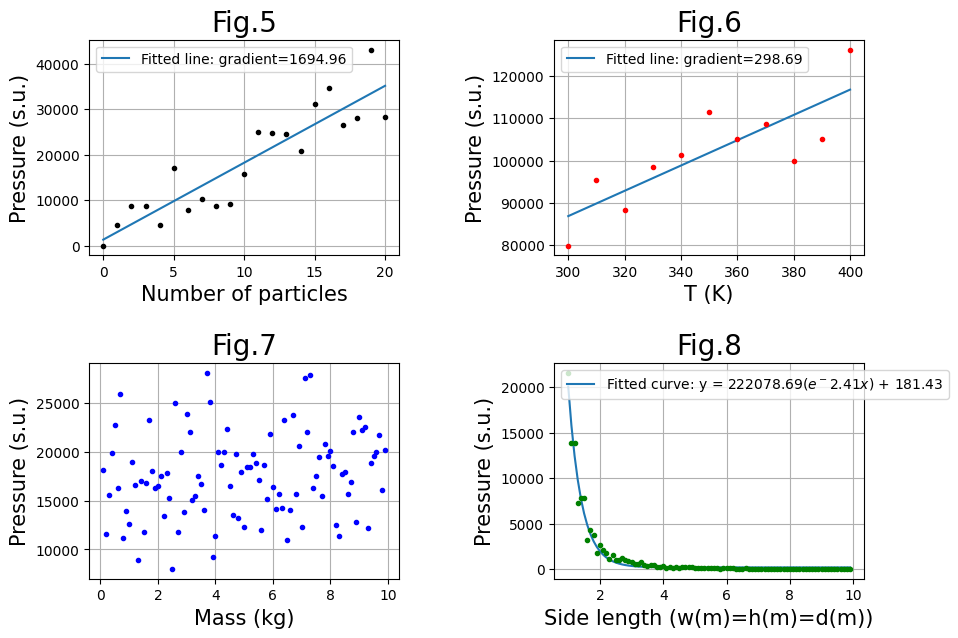

In [85]:
# Setting up figure for plotting pressure graphs
fig5 = plt.figure(figsize=(10,7))
fig5.tight_layout()

# Plotting pressure graph
ax1 = fig5.add_subplot(2,2,1)
ax1.plot(x1,y1,'-',label='Fitted line: gradient={0:0.2f}'.format(fit1[0]))
ax1.plot(N1,p1,'.',color='black')
ax1.set_xlabel("Number of particles",size=15)
ax1.set_ylabel("Pressure (s.u.)",size=15)
ax1.set_title("Fig.5",size=20)
ax1.legend(fontsize=10)
ax1.grid()

# Plotting pressure graph
ax2 = fig5.add_subplot(2,2,2)
ax2.plot(x2,y2,'-',label='Fitted line: gradient={0:0.2f}'.format(fit2[0]))
ax2.plot(T2,p2,'.',color='red')
ax2.set_xlabel("T (K)",size=15)
ax2.set_ylabel("Pressure (s.u.)",size=15)
ax2.set_title("Fig.6",size=20)
ax2.legend(fontsize=10)
ax2.grid()

# Plotting pressure graph
ax3 = fig5.add_subplot(2,2,3)
ax3.plot(m3,p3,'.',color='blue')
ax3.set_xlabel("Mass (kg)",size=15)
ax3.set_ylabel("Pressure (s.u.)",size=15)
ax3.set_title("Fig.7",size=20)
ax3.grid()

# Plotting pressure graph
ax4 = fig5.add_subplot(2,2,4)
ax4.plot(w4, Exp(w4, m, t, b), '-',label='Fitted curve: y = {0:0.2f}($e ^-{1:0.2f}x$) + {2:0.2f}'.format(m,t,b))
ax4.plot(w4,p4,'.',color='green')
ax4.set_xlabel("Side length (w(m)=h(m)=d(m))",size=15)
ax4.set_ylabel("Pressure (s.u.)",size=15)
ax4.set_title("Fig.8",size=20)
ax4.legend(fontsize=10,loc='upper left')
ax4.grid()

fig5.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

I am going to take the square root of the gradient input from the covarience matrix to provide an estimate for the uncertainty.

In [86]:
uncertainty1 = np.sqrt((cov1[0][0])**(1))
uncertainty1

183.74193970875874

In [87]:
corr1 = pearsonr(N1,p1)
corr1[0]

0.9041427011886661

In [88]:
uncertainty2 = np.sqrt((cov2[0][0]))
uncertainty2

70.40403798702799

In [89]:
corr2 = pearsonr(T2,p2)
corr2[0]

0.8164846032102882

In [90]:
uncertainty3 = np.sqrt((cov3[1][1]))
uncertainty3

0.08694262166375351

In [91]:
corr3 = pearsonr((1/w4),p4)
corr3[0]

0.8694665974540636

In [92]:
# Option to save figure as a PDF
fig5.savefig('pressureplots.pdf')

I am satisfied with these pressure plots as they match my expectations. I have plotted a line of best fit for the directly proportional plots to aid my analysis.

I will now rewrite my piston height equation in 3D using equations of motion outlined in [1] and [2]. I will include collision times, collision heights and particle positions to graphically indicate when the piston collides with a particle and so I can provide snapshots of the particles' distribution during the simulation. 

In [93]:
def piston_height3D(T,m,m_piston,w,h,d,h0,N,total_time):
    """
    This function determines the piston's height at each timestep for a 3D system
    (within total_time) while attached to a box containing gas particle(s) with mass m and 
    absolute temperature T in a box of width w, height h and depth d. The velocities of the 
    particles are distributed according to the Maxwell-Boltzmann 3D distribution.
    
    Inputs:
    T           - absolute temperature of gas (Kelvin)
    m           - mass of gas particle (kg)
    m_piston    - mass of piston (kg)
    w           - width of box (m)
    h           - initial maximum height of gas particles (m)
    d           - depth of box (m)
    h0          - initial height of piston (above bottem of box) (m)
    N           - number of particles in gas
    total_time  - simulation time (s)
    
    Outputs:
    h           - array of piston's height at each timestep (m)
    time        - array of time incrementations (s)
    coll_time   - array of collision times (s)
    coll_height - array of the piston's height at each collision (m)
    x           - array of horizontal particle position components (m)
    y           - array of vertical particle position components (m)
    z           - array of depth particle position components (m)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
     
    z0 = []
    
    for i in range(0,N):
        n5 = random.uniform(tol,d-tol)
        z0.append(n5)
    
    # Setting Boltzmann constant to zero
    k_B = 1
    
    # Generating random number [0,1-tol] for each particle
    U = np.random.uniform(0,1-tol,N) # To avoid infinite value

    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt((T*k_B)/m)*maxwell.ppf(U[i])
        s.append(s_next)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.uniform(-1,1)*np.sqrt(s[i]**2-u[i]**2)
        v.append(n4)
        
    k = []
    
    for i in range(0,N):
        n6 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2)-(v[i]**2))
        k.append(n6)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    z0 = np.array(z0)
    u = np.array(u)
    v = np.array(v)
    k = np.array(k)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    z = []
    
    for i in range(N):
        z.append([z0[i]])
    
    # Gravitational acceleration constant
    g = 9.81
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Setting up lists for piston's attributes and collision times/heights
    height = []
    v_piston = []
    time = []
    coll_time = []
    coll_height = []
    v_next = 0
    
    # Propagation of particles' and piston's motion
    while t < total_time:
        
        # Piston equations of motion
        v_next = v_next - (g*dt)
        v_piston.append(v_next)
        height_next = h0 + (v_next*dt) - (0.5)*(g)*(dt**2)
        height.append(height_next)
        
        # Re-initializing starting positions for each timestep
        h0 = height_next
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            z_next = z0[i] + k[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            z0[i] = z_next
            
            # Documenting particles' positions
            x[i].append(x_next)
            y[i].append(y_next)
            z[i].append(z_next)
            
            # Boundary conditions (perfectly elastic collisions)
            # + piston collision conditions
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            
            if z_next < tol:
                z0[i] = z_next
                k[i] = -k[i]
            
            if z_next > d-tol:
                z0[i] = z_next
                k[i] = -k[i]
            
            # Piston collision conditions
            if y_next > height_next-tol:
                y0[i] = y_next
                v[i] = -v[i]
                
                # Piston's change of velocity from conservation of linear momentum
                v_next = v_next + (2*m*abs(v[i]))/(m_piston+m)
                v_piston.append(v_next)
            
                # Piston's height change as a result of the collision
                height_next = h0 + v_next*dt + (dt**2)*((2*m*abs(v[i]))/(2*m*dt))
                height.append(height_next)
                
                # Re-initializing starting positions for each timestep
                h0 = height_next
                
                # Propagating timer and documenting intervals
                t += dt
                time.append(t)
                
                # Documenting collision times and heights
                coll_time.append(t) 
                coll_height.append(height_next)    
        
        t += dt
        time.append(t)

    return time,height,coll_time,coll_height,x,y,z

I will plot the piston's height variation as well as the spatial distribution of the particles at intervals.

In [94]:
%%time

# Setting up parameters for simulation
T = 500
m = 1
m_piston = 100
w = 1
h = 1
d = 1
h0 = 10
N = 10
total_time = 20 

# Determining array of piston heights
values = piston_height3D(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 24.2 s, sys: 709 ms, total: 24.9 s
Wall time: 25 s


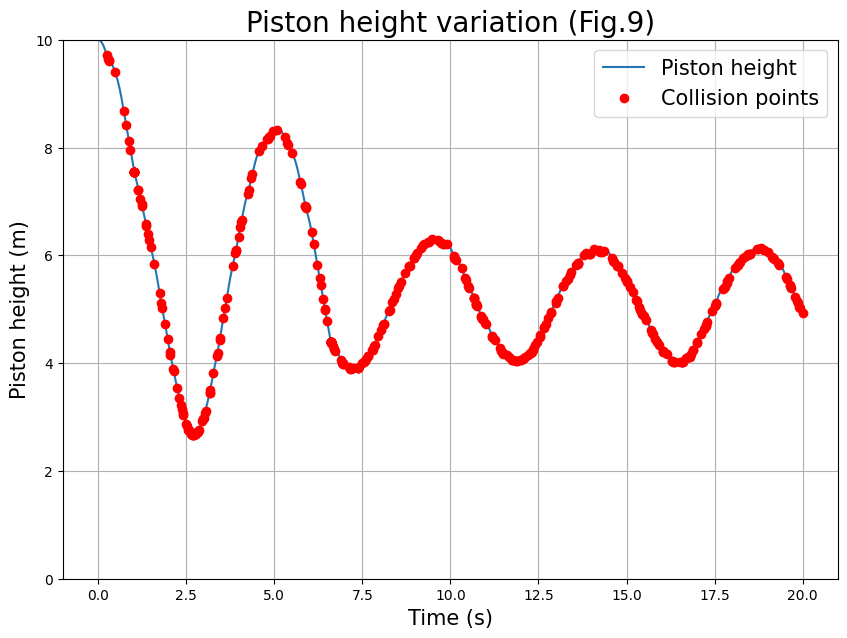

CPU times: user 2.87 s, sys: 21.9 ms, total: 2.89 s
Wall time: 2.91 s


In [95]:
%%time

# Setting up figure 
fig9 = plt.figure(figsize=(10,7))

# Plotting piston height variation
ax1 = fig9.add_subplot(111)
ax1.plot(values[0],values[1],label="Piston height")
ax1.plot(values[2],values[3],'ro',label="Collision points")
ax1.set_title("Piston height variation (Fig.9)",size=20)
ax1.set_xlabel("Time (s)",size=15)
ax1.set_ylabel("Piston height (m)",size=15)
ax1.set_ylim([0,10])
ax1.legend(fontsize=15,loc='upper right')

plt.grid()
plt.show()

In [96]:
# Option to save figure as a PDF
fig9.savefig('piston_height1.pdf')

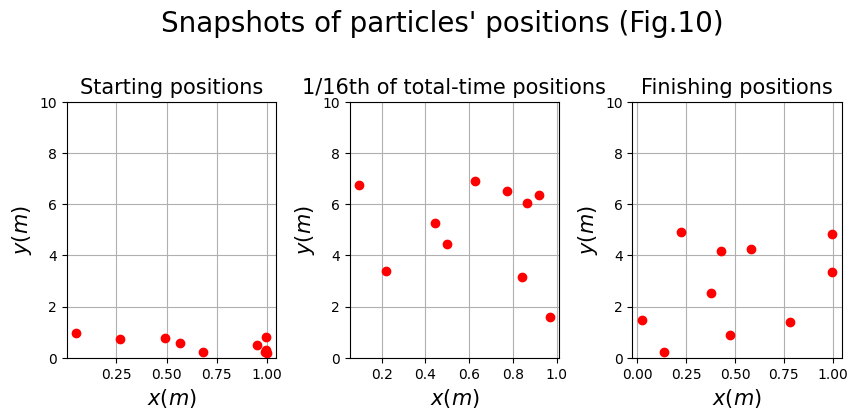

CPU times: user 241 ms, sys: 2 ms, total: 243 ms
Wall time: 245 ms


In [97]:
%%time
N = 10

# Setting up figure for snapshots of particle distribution
fig10 = plt.figure(figsize=(10,4))
fig10.tight_layout()
fig10.subplots_adjust(top=0.75,wspace=0.35,hspace=0.5)
fig10.suptitle("Snapshots of particles' positions (Fig.10)",size=20)

ax1 = fig10.add_subplot(131)
ax2 = fig10.add_subplot(132)
ax3 = fig10.add_subplot(133)

# Setting up distributions
for i in range(N):
    # Initial distribution
    ax1.plot(values[4][i][0:1],values[5][i][0:1],'ro')
    
    # 1/16th of total time distribution
    ax2.plot(values[4][i][int((len(values[4][0])/16)):int((len(values[4][0])/16))+1]
                   ,values[5][i][int((len(values[4][0])/16)):int((len(values[4][0])/16))+1]
                   ,'ro')
    
    # Final distribution
    ax3.plot(values[4][i][int(len(values[4][0]))-1:int(len(values[4][0]))]
                   ,values[5][i][int(len(values[4][0]))-1:int(len(values[4][0]))]
                   ,'ro')

# Setting up plot
ax1.set_title("Starting positions",size=15)
ax1.set_xlabel(r'$x(m)$',size=15)
ax1.set_ylabel(r'$y(m)$',size=15)
ax1.set_ylim(0,10)
ax1.grid()

# Setting up plot
ax2.set_title("1/16th of total-time positions",size=15)
ax2.set_xlabel(r'$x(m)$',size=15)
ax2.set_ylabel(r'$y(m)$',size=15)
ax2.set_ylim(0,10)
ax2.grid()

# Setting up plot
ax3.set_title("Finishing positions",size=15)
ax3.set_xlabel(r'$x(m)$',size=15)
ax3.set_ylabel(r'$y(m)$',size=15)
ax3.set_ylim(0,10)
ax3.grid()

plt.show()

In [98]:
# Option to save figure as a PDF
fig10.savefig('particledist.pdf')

I have chosen to display the spatial distribution of the particles after 1/16th of the total time so I can show how the particles are able to move up towards the piston.

I am going to re-define my piston_height3D function so it only outputs the time and the piston's height in an attempt to reduce computational time. I am unsure whether this will work as I am aware that the function has to calculate the particles' positions anyway.

In [99]:
def piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time):
    """
    This function determines the piston's height at each timestep for a 3D system
    (within total_time) while attached to a box containing gas particle(s) with mass m and 
    absolute temperature T in a box of width w, height h and depth d. The velocities of the 
    particles are distributed according to the Maxwell-Boltzmann 3D distribution.
    
    Inputs:
    T           - absolute temperature of gas (Kelvin)
    m           - mass of gas particle (kg)
    m_piston    - mass of piston (kg)
    w           - width of box (m)
    h           - initial maximum height of gas particles (m)
    d           - depth of box (m)
    h0          - initial height of piston (above bottem of box) (m)
    N           - number of particles in gas
    total_time  - simulation time (s)
    
    Outputs:
    h           - array of piston's height at each timestep (m)
    time        - array of time incrementations (s)
    coll_time   - array of collision times (s)
    coll_height - array of the piston's height at each collision (m)
    x           - array of horizontal particle position components (m)
    y           - array of vertical particle position components (m)
    z           - array of depth particle position components (m)
    
    """
    
    # Setting a tolerance for collision definitions
    tol = 1e-10
    
    # Generating N random initial positons within the box's boundaries
    x0 = []
    
    for i in range(0,N):
        n1 = random.uniform(tol,w-tol)
        x0.append(n1)
    
    y0 = []
    
    for i in range(0,N):
        n2 = random.uniform(tol,h-tol)
        y0.append(n2)
     
    z0 = []
    
    for i in range(0,N):
        n5 = random.uniform(tol,d-tol)
        z0.append(n5)
    
    # Setting Boltzmann constant to zero
    k_B = 1
    
    # Generating random number [0,1-tol] for each particle
    U = np.random.uniform(0,1-tol,N) # To avoid infinite value

    # Determining each particle's magnitude of velocity
    s = []
    for i in range(N):
        s_next = np.sqrt((T*k_B)/m)*maxwell.ppf(U[i])
        s.append(s_next)
    
    # Allocating random velocity components to each particle
    u = []
    
    for i in range(0,N):
        n3 = random.uniform(-1,1)*s[i]
        u.append(n3)
    
    v = []
    
    for i in range(0,N):
        n4 = random.uniform(-1,1)*np.sqrt(s[i]**2-u[i]**2)
        v.append(n4)
        
    k = []
    
    for i in range(0,N):
        n6 = random.choice([-1,1]) * np.sqrt((s[i]**2)-(u[i]**2)-(v[i]**2))
        k.append(n6)
    
    # Defining initial postions and velocities as numpy arrays
    x0 = np.array(x0)
    y0 = np.array(y0)
    z0 = np.array(z0)
    u = np.array(u)
    v = np.array(v)
    k = np.array(k)
    
    # Position arrays
    x = []
    
    for i in range(N):
        x.append([x0[i]])
    
    y = []
    
    for i in range(N):
        y.append([y0[i]])
    
    z = []
    
    for i in range(N):
        z.append([z0[i]])
    
    # Gravitational acceleration constant
    g = 9.81
    
    # Defining timestep and initializing timer
    t = 0
    dt = 1e-5
    
    # Setting up lists for piston's attributes
    height = []
    v_piston = []
    time = []
    v_next = 0
    
    # Propagation of particles' and piston's motion
    while t < total_time:
        
        # Piston equations of motion
        v_next = v_next - (g*dt)
        v_piston.append(v_next)
        height_next = h0 + (v_next*dt) - (0.5)*(g)*(dt**2)
        height.append(height_next)
        
        # Re-initializing starting positions for each timestep
        h0 = height_next
        
        # Considering each particle
        for i in range(N):
            
            # Particle equations of motion
            x_next = x0[i] + u[i]*dt
            y_next = y0[i] + v[i]*dt
            z_next = z0[i] + k[i]*dt
            
            # Re-initializing starting positions for each timestep
            x0[i] = x_next
            y0[i] = y_next
            z0[i] = z_next
            
            # Documenting particles' positions
            x[i].append(x_next)
            y[i].append(y_next)
            z[i].append(z_next)
            
            # Boundary conditions (perfectly elastic collisions)
            # + piston collision conditions
            if x_next < tol:            
                x0[i] = x_next
                u[i] = -u[i]
            
            if x_next > w-tol:
                x0[i] = x_next
                u[i] = -u[i]
            
            if y_next < tol:
                y0[i] = y_next
                v[i] = -v[i]
            
            if z_next < tol:
                z0[i] = z_next
                k[i] = -k[i]
            
            if z_next > d-tol:
                z0[i] = z_next
                k[i] = -k[i]
            
            # Piston collision conditions
            if y_next > height_next-tol:
                y0[i] = y_next
                v[i] = -v[i]
                
                # Piston's change of velocity from conservation of linear momentum
                v_next = v_next + (2*m*abs(v[i]))/(m_piston+m)
                v_piston.append(v_next)
            
                # Piston's height change as a result of the collision
                height_next = h0 + v_next*dt + (dt**2)*((2*m*abs(v[i]))/(2*m*dt))
                height.append(height_next)
                
                # Re-initializing starting positions for each timestep
                h0 = height_next
                
                # Propagating timer and documenting intervals
                t += dt
                time.append(t)
                    
        
        t += dt
        time.append(t)

    return time,height

I will now plot the piston's height variation against time for different number of particles in the system and observe the effects on the fluctuations.

In [100]:
%%time

# Setting up parameters for simulation
T = 500
m = 1
m_piston = 100
w = 1
h = 1
d = 1
h0 = 10
N = 10
total_time = 20 

# Calling function to determine piston height
values1 = piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 25.4 s, sys: 719 ms, total: 26.1 s
Wall time: 26.2 s


In [101]:
%%time

# Setting up parameters for simulation
T = 500
m = 1
m_piston = 100
w = 1
h = 1
d = 1
h0 = 10
N = 20
total_time = 20 

# Calling function to determine piston height
values2 = piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 49.8 s, sys: 985 ms, total: 50.8 s
Wall time: 51 s


In [102]:
%%time

# Setting up parameters for simulation
T = 500
m = 1
m_piston = 100
w = 1
h = 1
d = 1
h0 = 10
N = 30
total_time = 20 

# Calling function to determine piston height
values3 = piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 1min 14s, sys: 1.32 s, total: 1min 15s
Wall time: 1min 16s


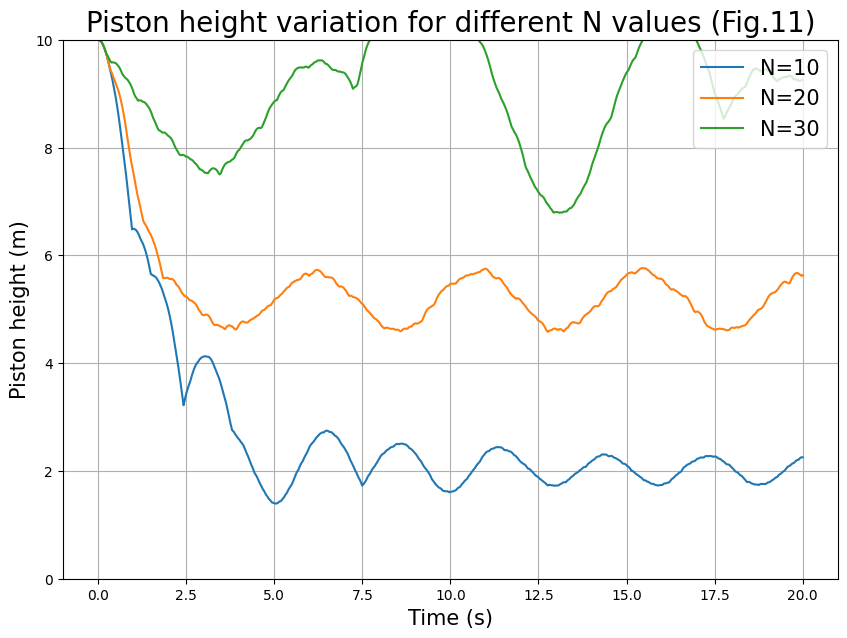

CPU times: user 2.06 s, sys: 31.9 ms, total: 2.09 s
Wall time: 2.1 s


In [103]:
%%time

# Setting up figure for plot
fig11 = plt.figure(figsize=(10,7))

ax1 = fig11.add_subplot(111)

ax1.plot(values1[0],values1[1],label="N=10")
ax1.plot(values2[0],values2[1],label="N=20")
ax1.plot(values3[0],values3[1],label="N=30")

ax1.set_title("Piston height variation for different N values (Fig.11)",size=20)
ax1.set_xlabel("Time (s)",size=15)
ax1.set_ylabel("Piston height (m)",size=15)
ax1.set_ylim([0,10])
ax1.legend(fontsize=15,loc='upper right')

plt.grid()
plt.show()

In [104]:
# Option to save figure as a PDF
fig11.savefig('pistonheightN.pdf')

I will now investigate the effect of a longer simulation time on the piston height fluctuations.

In [105]:
%%time

# Setting up parameters for simulation
T = 500
m = 1
m_piston = 100
w = 1
h = 1
d = 1
h0 = 10
N = 10
total_time = 100 

# Calling function to determine piston height
values4 = piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 2min 6s, sys: 4.86 s, total: 2min 11s
Wall time: 2min 11s


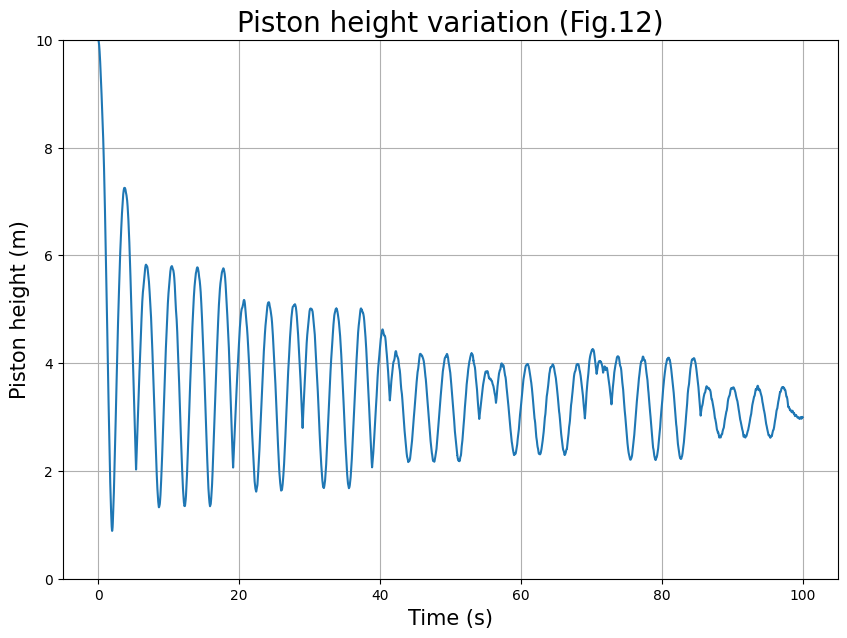

CPU times: user 3.79 s, sys: 432 ms, total: 4.22 s
Wall time: 4.24 s


In [106]:
%%time

# Setting up figure for plot
fig12 = plt.figure(figsize=(10,7))

ax1 = fig12.add_subplot(111)

ax1.plot(values4[0],values4[1])


ax1.set_title("Piston height variation (Fig.12)",size=20)
ax1.set_xlabel("Time (s)",size=15)
ax1.set_ylabel("Piston height (m)",size=15)
ax1.set_ylim([0,10])

plt.grid()
plt.show()

In [107]:
# Option to save figure as a PDF
fig12.savefig('pistonheightlongtime.pdf')

I will next seek to plot how the average height changes with temperature and number of molecules.

## 08/03/21

In [108]:
%%time

# Setting up parameters for simulation
T = np.arange(300,630,10)
m = 1
m_piston = 100
w = 1
h = 9.5
d = 1
h0 = 10
N = 50
total_time = 5

av_height = []

# Calculating average piston height for varying temperature
for i in range(len(T)):
    vals = piston_height3D_redacted_output(T[i],m,m_piston,w,h,d,h0,N,total_time)
    av_height_next = np.sum(vals[1])/len(vals[1])
    av_height.append(av_height_next)  

CPU times: user 17min 14s, sys: 23.6 s, total: 17min 38s
Wall time: 17min 41s


In [109]:
# Line of best fit
degree4 = 1
fit4,cov4 = np.polyfit(T,av_height,degree4,cov=True)
line4 = np.poly1d(fit4)
x4 = np.linspace(300,630,len(T))
y4 = line4(x4)

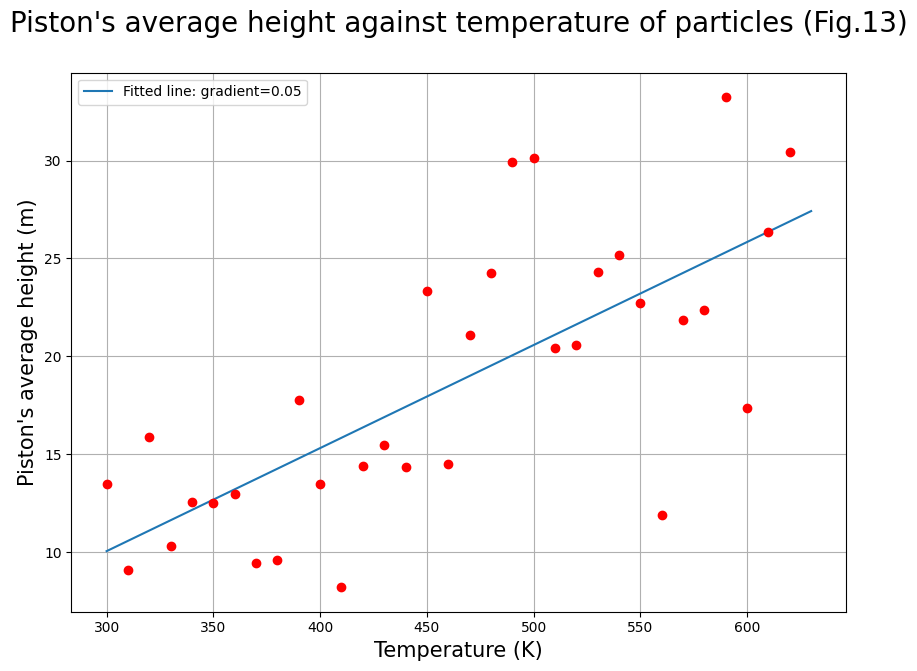

CPU times: user 141 ms, sys: 4 ms, total: 145 ms
Wall time: 148 ms


In [110]:
%%time

# Setting up plot
fig13= plt.figure(figsize=(10,7))

ax1 = fig13.add_subplot(111)
ax1.plot(x4,y4,'-',label='Fitted line: gradient={0:0.2f}'.format(fit4[0]))
ax1.plot(T,av_height,'o',color='red')
ax1.set_xlabel("Temperature (K)",size=15)
ax1.set_ylabel("Piston's average height (m)",size=15)
ax1.set_title("Piston's average height against temperature of particles (Fig.13)\n",size=20)
ax1.legend(fontsize=10)
plt.grid()
plt.show()

In [111]:
uncertainty4 = np.sqrt(cov4[0][0])
uncertainty4

0.008918643110804115

In [112]:
corr4 = pearsonr(T,av_height)
corr4

PearsonRResult(statistic=0.727444076809885, pvalue=1.6189496269133487e-06)

In [113]:
# Option to save figure as a PDF
fig13.savefig('pistonavgheight.pdf')

This plot is of average height against temperature and I have plotted a line of best fit to show the positive correlation.

In [114]:
%%time

# Setting up parameters for simulation
ratio = np.arange(1,11,1)
m_piston = 100*ratio

T = 600
m = 1
w = 1
h = 9.5
d = 1
h0 = 10
N = 50
total_time = 5

av_height2 = []

# Calculating average piston height for varying mass ratio
for i in range(len(ratio)):
    vals = piston_height3D_redacted_output(T,m,m_piston[i],w,h,d,h0,N,total_time)
    av_height_next = np.sum(vals[1])/len(vals[1])
    av_height2.append(av_height_next)  

CPU times: user 4min 51s, sys: 6.69 s, total: 4min 58s
Wall time: 4min 59s


In [115]:
# Exponential fitted curve
guess = (10,10,1)
parameters2, cov5 = scipy.optimize.curve_fit(Exp,ratio,av_height2,guess)
m, t, b = parameters2

/tmp/ipykernel_81770/3215734088.py:3: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b


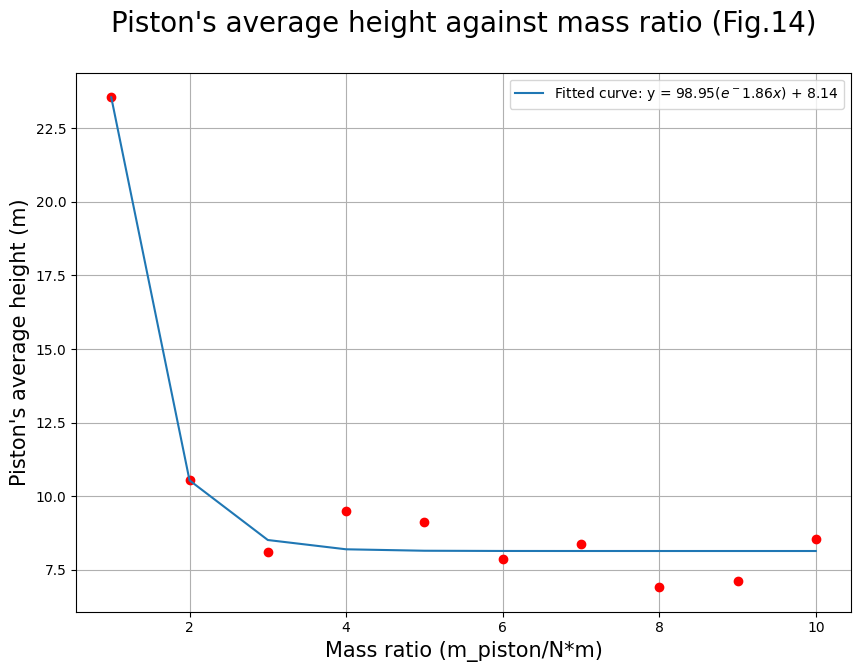

CPU times: user 163 ms, sys: 4.99 ms, total: 168 ms
Wall time: 173 ms


In [116]:
%%time

# Setting up plot
fig14= plt.figure(figsize=(10,7))

ax1 = fig14.add_subplot(111)

ax1.plot(ratio,av_height2,'o',color='red')
ax1.plot(ratio, Exp(ratio, m, t, b), '-',label='Fitted curve: y = {0:0.2f}($e ^-{1:0.2f}x$) + {2:0.2f}'.format(m,t,b))
ax1.set_xlabel("Mass ratio (m_piston/N*m)",size=15)
ax1.set_ylabel("Piston's average height (m)",size=15)
ax1.set_title("Piston's average height against mass ratio (Fig.14)\n",size=20)
ax1.legend(fontsize=10)
plt.grid()
plt.show()

In [117]:
uncertainty5 = np.sqrt(cov5[1][1])
uncertainty5

0.39234115771963596

In [118]:
corr5 = pearsonr(1/ratio,av_height2)[0]
corr5

0.946432887103334

In [119]:
# Option to save figure as a PDF
fig14.savefig('pistonmassratio.pdf')

This final plot will not be included in the final report, I have generated it to verify the results in Fig.14.

In [120]:
%%time

# Setting up parameters for simulation
T = 600
m = 1
m_piston = 2000
w = 1
h = 9.5
d = 1
h0 = 10
N = 50
total_time = 5 

# Generating piston heights
values = piston_height3D_redacted_output(T,m,m_piston,w,h,d,h0,N,total_time)

CPU times: user 30.9 s, sys: 768 ms, total: 31.7 s
Wall time: 31.7 s


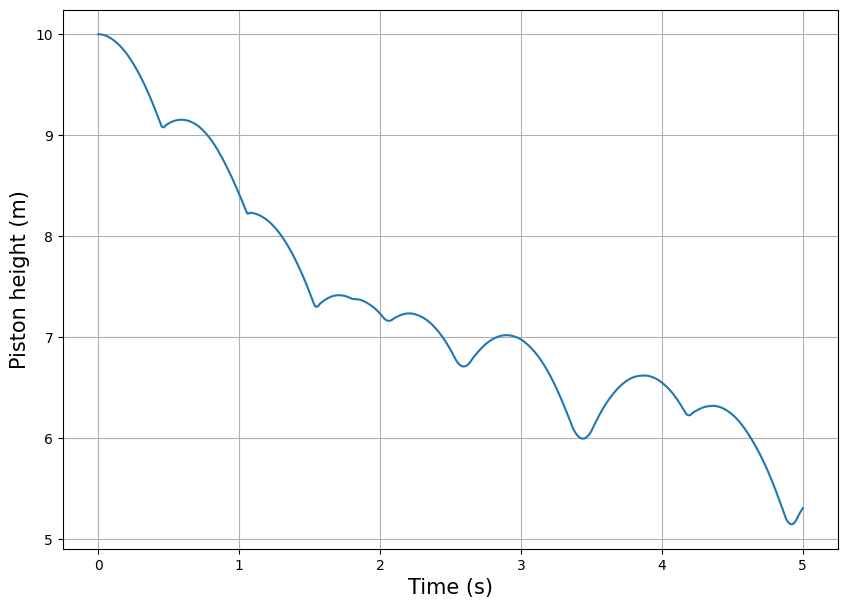

CPU times: user 282 ms, sys: 1.01 ms, total: 283 ms
Wall time: 286 ms


In [121]:
%%time

# Setting up plot
fig15 = plt.figure(figsize=(10,7))

ax1 = fig15.add_subplot(111)

ax1.plot(values[0],values[1])

ax1.set_xlabel("Time (s)",size=15)
ax1.set_ylabel("Piston height (m)",size=15)

plt.grid()
plt.show()

In [122]:
# Average height calculation
np.sum(values[1])/len(values[1])

7.292887426080658

I am satified with all the plots I have generated. I will now proceed to analyse the data within each of these plots in my final report.

## References:

Collisions | Boundless Physics, Courses.lumenlearning.com, https://courses.lumenlearning.com/boundless-physics/chapter/collisions/ - [1]

Session 7 PHAS0030, Prof David Bowler, 2020/2021 – [2]